In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('display.max_row',100)
pd.set_option('display.max_columns',400)
pd.set_option('display.float_format','{:20,.2f}'.format)
pd.set_option('display.max_colwidth',600)
import json
import os
import gc
import time
import sys
import io
import re
import datetime
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import BayesianRidge, LinearRegression
from sklearn import ensemble
from tqdm import tqdm
from sklearn.feature_extraction.text import TfidfVectorizer
from pympler import tracker
os.listdir("./data/")

['.DS_Store',
 'indiegogo',
 'export_20181106_1552.csv',
 'Ad-Sets-Oct-19-2018-Oct-29-2018.csv',
 'indiegogo_orders.csv',
 'KAG_conversion_data.csv',
 'data_rule.csv',
 'Vinci-Report-Oct-19-2018-Oct-24-2018.csv',
 'Inspero-Inc.-0927-86396-03-Ad-Sets-Lifetime.csv']

In [2]:
def drawbar(col):
    data = df[col].value_counts().reset_index().rename(columns = {col:'count'})
    sns.barplot(x = 'count',y = 'index',data = data[:25])

In [3]:
def draw_horizontal_bar_compare_roas(col,df):
    d = df[['ROAS',col]].groupby(col).agg({'ROAS': 'mean'}).reset_index().sort_values(by = 'ROAS',ascending = False)[:20]
    sns.barplot(x = 'ROAS',y = col,data = d,orient = 'h')

In [4]:
used_rules_cols = ['Campaign Name','Ad Set ID','Ad Set Name','Age Max','Age Min','Countries','Custom Audiences','Gender','Flexible Inclusions','Product 1 - Link','Publisher Platforms','Facebook Positions','Instagram Positions','Device Platforms','Title','Body']

# new1  
# rules
df_indiegogo_rules_new1 = pd.read_csv('./data/indiegogo/new1_setting_utf8.csv',sep = '\t',dtype = {'Ad Set ID':'str','Custom Audiences':'str'},encoding = 'utf-8')
df_indiegogo_rules_new1 = df_indiegogo_rules_new1[df_indiegogo_rules_new1["Campaign Name"].str.contains('indie',case = False)]
df_indiegogo_rules_new1 = df_indiegogo_rules_new1[used_rules_cols]
# data
df_indiegogo_data_new1 = pd.read_csv('./data/indiegogo/new1_data_utf8.csv',sep = ',',dtype = {'Ad Set ID':'str'},encoding = 'utf-8')
df_indiegogo_rules_new1['Ad Set ID'] = df_indiegogo_rules_new1['Ad Set ID'].apply(lambda x: x.split(':')[1])
# summary
data_new1 = df_indiegogo_rules_new1.merge(df_indiegogo_data_new1,how = 'left',on = 'Ad Set ID')
#==============================================================================================================

# new2 
# rules
df_indiegogo_rules_new2 = pd.read_csv('./data/indiegogo/new2_setting_utf8.csv',sep = '\t',dtype = {'Ad Set ID':'str','Custom Audiences':'str'},encoding = 'utf-8')
df_indiegogo_rules_new2 = df_indiegogo_rules_new2[df_indiegogo_rules_new2["Campaign Name"].str.contains('indie',case = False)]
df_indiegogo_rules_new2 = df_indiegogo_rules_new2[used_rules_cols]
# data
df_indiegogo_data_new2 = pd.read_csv('./data/indiegogo/new2_data_utf8.csv',sep = ',',dtype = {'Ad Set ID':'str'},encoding = 'utf-8')
df_indiegogo_rules_new2['Ad Set ID'] = df_indiegogo_rules_new2['Ad Set ID'].apply(lambda x: x.split(':')[1])
# summary
data_new2 = df_indiegogo_rules_new2.merge(df_indiegogo_data_new2,how = 'left',on = 'Ad Set ID')

#==============================================================================================================


# old2 
# rules
df_indiegogo_rules_old2 = pd.read_csv('./data/indiegogo/old2_setting_utf8.csv',sep = '\t',dtype = {'Ad Set ID':'str','Custom Audiences':'str'},encoding = 'utf-8')
df_indiegogo_rules_old2 = df_indiegogo_rules_old2[df_indiegogo_rules_old2["Campaign Name"].str.contains('indie',case = False)]
df_indiegogo_rules_old2 = df_indiegogo_rules_old2[used_rules_cols]
# data
df_indiegogo_data_old2 = pd.read_csv('./data/indiegogo/old2_data_utf8.csv',sep = ',',dtype = {'Ad Set ID':'str'},encoding = 'utf-8')
df_indiegogo_rules_old2['Ad Set ID'] = df_indiegogo_rules_old2['Ad Set ID'].apply(lambda x: x.split(':')[1])
# summary
data_old2 = df_indiegogo_rules_old2.merge(df_indiegogo_data_old2,how = 'left',on = 'Ad Set ID')

#==============================================================================================================

# old3 
# rules
df_indiegogo_rules_old3 = pd.read_csv('./data/indiegogo/old3_setting_utf8.csv',sep = '\t',dtype = {'Ad Set ID':'str','Custom Audiences':'str'},encoding = 'utf-8')
df_indiegogo_rules_old3 = df_indiegogo_rules_old3[df_indiegogo_rules_old3["Campaign Name"].str.contains('indie',case = False)]
df_indiegogo_rules_old3 = df_indiegogo_rules_old3[used_rules_cols]
# data
df_indiegogo_data_old3 = pd.read_csv('./data/indiegogo/old3_data_utf8.csv',sep = ',',dtype = {'Ad Set ID':'str'},encoding = 'utf-8')
df_indiegogo_rules_old3['Ad Set ID'] = df_indiegogo_rules_old3['Ad Set ID'].apply(lambda x: x.split(':')[1])
# summary
data_old3 = df_indiegogo_rules_old3.merge(df_indiegogo_data_old3,how = 'left',on = 'Ad Set ID')
#==============================================================================================================


data = pd.concat([data_new1,data_new2,data_old2,data_old3],axis = 0)

/Users/Rick/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3020: DtypeWarning: Columns (30,40,54,107,244,254) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
/Users/Rick/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3020: DtypeWarning: Columns (30,82,107,255) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
/Users/Rick/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:55: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.



In [5]:
def apply_interest(x):
    if pd.notna(x):
        keys = x.keys()
        for key_num,key in enumerate(keys):
            if key_num != 0:
                result = "|" + key + ":" + x[key][0]['name']
            else:
                result = key + ":" + x[key][0]['name']
            for i in range(1,len(x[key])):
                result = result + '_' + x[key][i]['name']
    else:
        return ''
    return result    

In [6]:
# preprocess and feature engineering
# step 1 change column name
data.rename(columns = {'Flexible Inclusions':'Interest','CPM (Cost per 1,000 Impressions) (USD)':'CPM','CTR (Link Click-Through Rate)':'CTR','CPC (Cost per Link Click) (USD)':'CPC','Amount Spent (USD)':'Spent','Website Purchases':'Conversions','Cost per Purchase (USD)':'CPR','Website Purchase ROAS (Return on Ad Spend)':'ROAS','Product 1 - Link':'Product Link','Ad Set Name_x':'Ad Set Name','Reporting Starts':'Day'},inplace = True)
    
# step 2 drop unused columns
unused_cols = ['Ad Set Name_y','Reporting Ends','Budget','Budget Type']
data.drop(columns = unused_cols,inplace = True)   
# step 3 null values
cols_nan_zeros = ['CTR','Link Clicks','Conversions','Website Purchases Conversion Value','Landing Page Views','ROAS']
for col in cols_nan_zeros:
    data[col].fillna(0,inplace = True)    
data['Gender'].fillna('All',inplace = True)    
# step 4  interest json expand
data['Interest'] = data['Interest'].apply(lambda x: json.loads(x)[0] if pd.notna(x) else None)
# data['Interest'] = data['Interest'].apply(lambda z: z['interests'][0]['name'] + '_' + z['interests'][1]['name'] if not pd.isnull(z) else '') 
data['Interest'] = data['Interest'].apply(apply_interest) 
# step 5 date format
data['Day'] = pd.to_datetime(data['Day'])
data['DayOfWeek'] = data['Day'].dt.dayofweek
data['DayOfMonth'] = data['Day'].dt.day
data['Month'] = data['Day'].dt.month
# step 6 contries format
data['Countries'] = data['Countries'].astype(str).apply(lambda c: c.replace(',','_').replace(' ',''))
# step 7 age format to str and daily budget
data['Age Max'] = data['Age Max'].astype('str')
data['Age Min'] = data['Age Min'].astype('str')
# step 8  apply lookalike rules to new features
pattern = re.compile(r"^(\w+) \([\w ]+ (\d{1,2}%)\) \- (\w+)$")
# pattern_pixel = re.compile(r"^ERL\_[purchase|checkout|payment](\w+)$")
data['Custom Audiences'] = data['Custom Audiences'].apply(lambda x: x.split(':')[1] if pd.notna(x) else None)
data['Group.Range'] = data['Custom Audiences'].apply(lambda x : pattern.match(x).group(2)   if pd.notna(x) and pattern.match(x) is not None else '')
data['Group.Source'] = data['Custom Audiences'].apply(lambda x : pattern.match(x).group(3) if pd.notna(x) and pattern.match(x) is not None else '')
data['IsLookalike'] = data['Custom Audiences'].apply(lambda x : 1 if pd.notna(x) else 0)
# step 9 CR
data['CR'] = data['Conversions'] / data['Link Clicks']
# step 10 filled na because of no people
cols_nan_nopeople = ['CPC','CPR','CR']
for col in cols_nan_nopeople:
    data[col] = data[col].fillna(-1) 
# step 11
platform_cols = ['Publisher Platforms','Facebook Positions','Instagram Positions','Device Platforms']
for col in platform_cols:
    data[col] = data[col].fillna("")
# step 12 day NAT deleted
data = data[data['Day'].notnull()]

# step 13  title body 
# data['Title'].fillna("",inplace = True)
# data['Body'].fillna("",inplace = True)
# vectorizer_title = TfidfVectorizer(max_features = 12)
# vectorizer_title.fit(data['Title'])
# df_title_tfidf = pd.DataFrame(vectorizer_title.transform(data['Title']).toarray(),dtype = 'float16',index = data.index)
# df_title_tfidf.columns = [ 'tfidf_title_' + str(id + 1) for id in range(12)]

# vectorizer_body = TfidfVectorizer(max_features = 12)
# vectorizer_body.fit(data['Body'])
# df_body_tfidf = pd.DataFrame(vectorizer_body.transform(data['Body']).toarray(),dtype = 'float16',index = data.index)
# df_body_tfidf.columns = [ 'tfidf_body_' + str(id + 1) for id in range(12)]

# data = pd.concat([data,df_title_tfidf,df_body_tfidf],axis = 1)


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 22193 entries, 0 to 5532
Data columns (total 35 columns):
Ad Set ID                             22193 non-null object
Ad Set Name                           22193 non-null object
Age Max                               22193 non-null object
Age Min                               22193 non-null object
Spent                                 22193 non-null float64
Body                                  22193 non-null object
CPC                                   22193 non-null float64
CPM                                   22193 non-null float64
CTR                                   22193 non-null float64
Campaign Name                         22193 non-null object
CPR                                   22193 non-null float64
Countries                             22193 non-null object
Custom Audiences                      19150 non-null object
Device Platforms                      22193 non-null object
Facebook Positions                    22193 non

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a18b12668>,
      dtype=object)

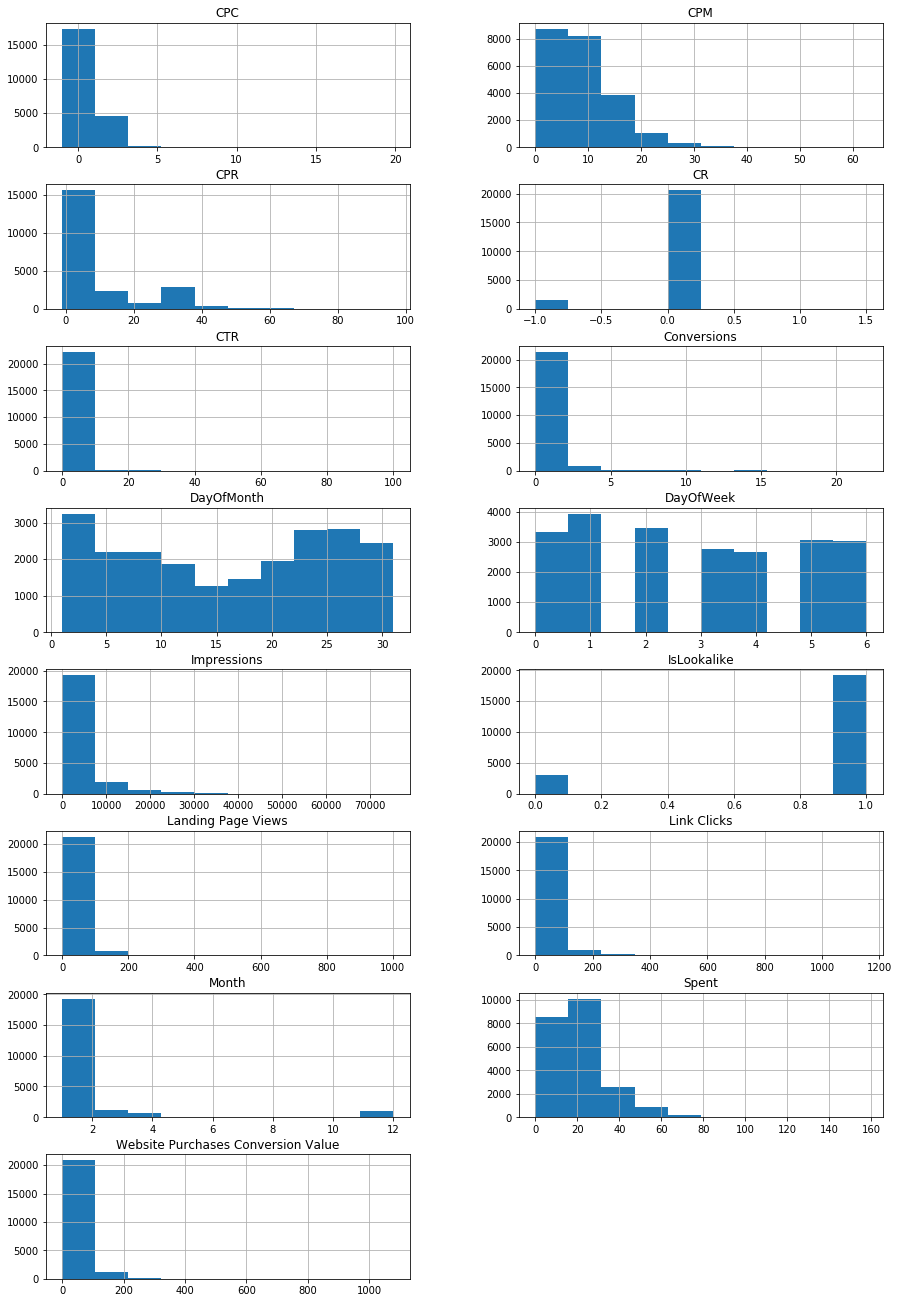

In [8]:
excluded_cols = ['Day','Ad Set ID','Custom Audiences','ROAS','Campaign Name','Title','Body','Ad Set Name']
real_cols = [col for col in data.columns if data[col].dtype != 'object' and col not in excluded_cols]
# real_cols_nottfidf = [col for col in real_cols if 'tfidf_' not in col]
# real_cols_tfidf = [col for col in real_cols if 'tfidf_' in col]
category_cols = ['Age Max','Age Min','Countries','Gender','Interest','Product Link','DayOfWeek','DayOfMonth','Month','Group.Range','Group.Source','IsLookalike']    
data[real_cols].hist(bins=10,figsize = (15,35),layout=(12,2))

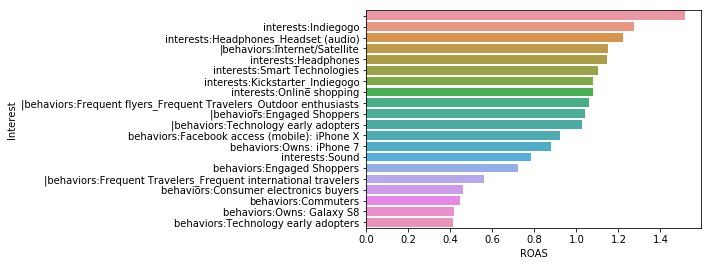

In [9]:
# display columns relation
draw_horizontal_bar_compare_roas('Interest',data)

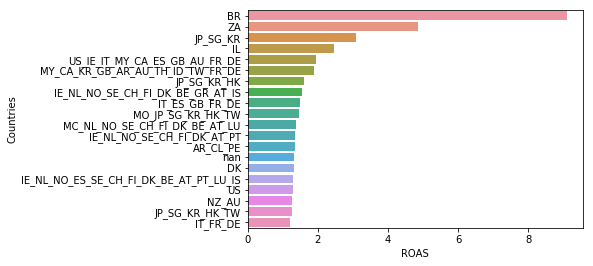

In [10]:
draw_horizontal_bar_compare_roas('Countries',data)

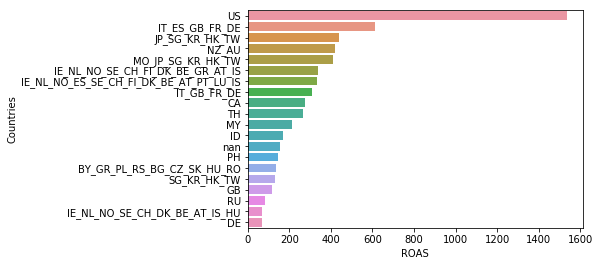

In [11]:
# come to count  
grouped_bydayofweek = data.loc[data.ROAS > 0,['Countries','ROAS']].groupby('Countries').count().reset_index().sort_values(['ROAS'],ascending = False)[:20]
sns.barplot(x = 'ROAS',y = 'Countries',data = grouped_bydayofweek)

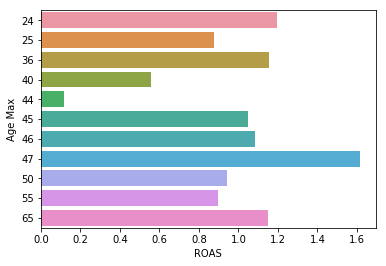

In [12]:
draw_horizontal_bar_compare_roas('Age Max',data)

,Age Max,ROAS
5,45,3554
10,65,2752
6,46,356
8,50,226
9,55,200
2,36,35
0,24,10
7,47,7
1,25,6
3,40,4


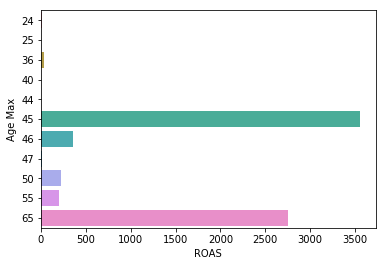

In [13]:
# come to count  
grouped_byagemax = data.loc[data.ROAS > 0,['Age Max','ROAS']].groupby('Age Max').count().reset_index().sort_values(['ROAS'],ascending = False)[:20]
sns.barplot(x = 'ROAS',y = 'Age Max',data = grouped_byagemax,orient = 'h')
grouped_byagemax

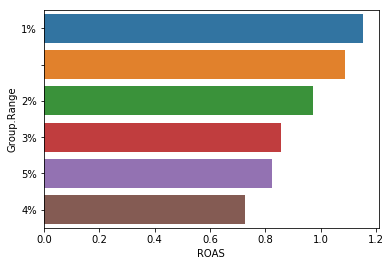

In [14]:
draw_horizontal_bar_compare_roas('Group.Range',data)

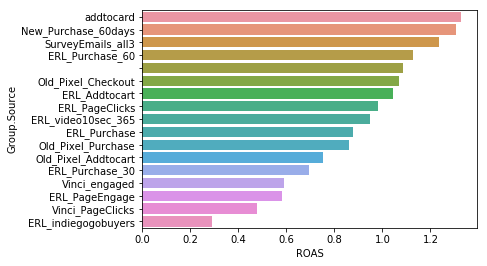

In [15]:
draw_horizontal_bar_compare_roas('Group.Source',data)

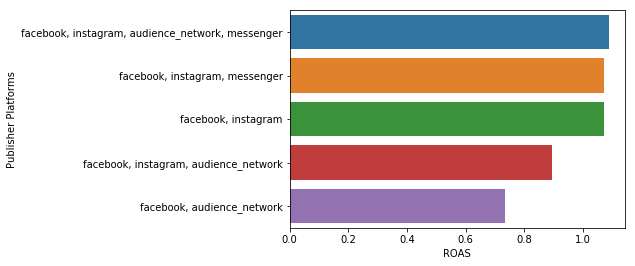

In [16]:
draw_horizontal_bar_compare_roas('Publisher Platforms',data)

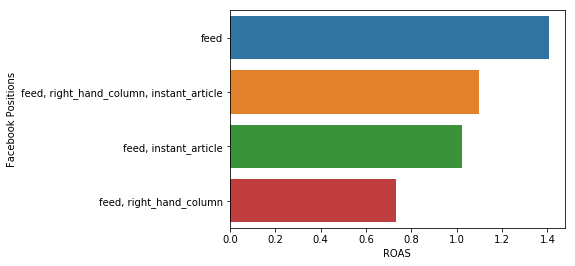

In [17]:
draw_horizontal_bar_compare_roas('Facebook Positions',data)

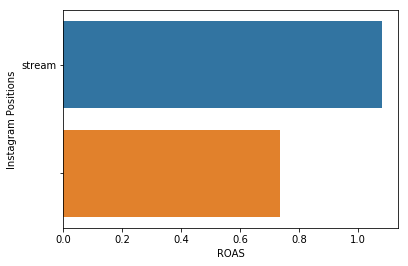

In [18]:
draw_horizontal_bar_compare_roas('Instagram Positions',data)

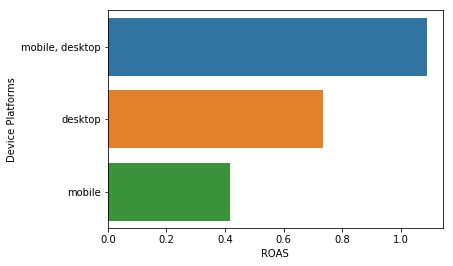

In [ ]:
draw_horizontal_bar_compare_roas('Device Platforms',data)

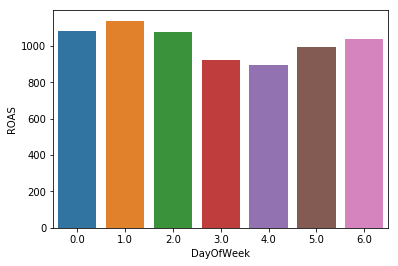

In [ ]:
# sns.scatterplot(x = 'DayOfWeek',y = 'ROAS',hue = 'Countries',data = data)
grouped_bydayofweek = data.loc[data.ROAS > 0,['DayOfWeek','ROAS']].groupby('DayOfWeek').count().reset_index()
sns.barplot(x = 'DayOfWeek',y = 'ROAS',data = grouped_bydayofweek )

In [ ]:
# groupbyday_cr = data[['CR','Day']].groupby('Day').mean().reset_index()
# sns.lineplot(x = 'Day',y = 'CR',data= groupbyday_cr)


In [ ]:
# groupbyday_cr = data[['CR','Product Link']].groupby('Product Link').mean().reset_index()
# sns.lineplot(x = 'Product Link',y = 'CR',data= groupbyday_cr)

In [ ]:
data_X = data[category_cols]
for col in category_cols:
    data_X[col] = preprocessing.LabelEncoder().fit_transform(data_X[col].astype(str))
data_y = data['ROAS']

/Users/Rick/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [ ]:
category_cols

['Age Max',
 'Age Min',
 'Countries',
 'Gender',
 'Interest',
 'Product Link',
 'DayOfWeek',
 'DayOfMonth',
 'Month',
 'Group.Range',
 'Group.Source',
 'IsLookalike']

In [ ]:
data_X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 22193 entries, 0 to 5532
Data columns (total 12 columns):
Age Max         22193 non-null int64
Age Min         22193 non-null int64
Countries       22193 non-null int64
Gender          22193 non-null int64
Interest        22193 non-null int64
Product Link    22193 non-null int64
DayOfWeek       22193 non-null int64
DayOfMonth      22193 non-null int64
Month           22193 non-null int64
Group.Range     22193 non-null int64
Group.Source    22193 non-null int64
IsLookalike     22193 non-null int64
dtypes: int64(12)
memory usage: 2.2 MB


In [ ]:
train_X,test_X,train_y,test_y = train_test_split(data_X,data_y,test_size = 0.2,random_state = 1986)

In [ ]:
# parameters = {'kernel':('linear', 'rbf'), 'C':[1, 10],'epsilon':[0.1,0.3]}
# svr = SVR(gamma='scale')

# clf = GridSearchCV(svr,parameters,cv = 5,n_jobs = -1)

# clf.fit(train_X,train_y)

# clf.best_params_

# clf.score(test_X,test_y)

In [ ]:
# train_X

In [ ]:
# regr = ensemble.RandomForestRegressor(max_depth=10, random_state=0,n_estimators=500)
# regr.fit(train_X, train_y)
# mse = mean_squared_error(test_y, regr.predict(test_X))
# print("MSE: %.4f" % mse)

# ols = LinearRegression()
# ols.fit(train_X, train_y)
# mse = mean_squared_error(test_y, ols.predict(test_X))
# print("MSE: %.4f" % mse)


# params = {'n_estimators': 500,'learning_rate': 0.01, 'loss': 'linear'}
# ada = ensemble.AdaBoostRegressor(**params)
# ada.fit(train_X, train_y)
# mse = mean_squared_error(test_y, ada.predict(test_X))
# print("MSE: %.4f" % mse)
# print(ada.predict(test_X))
# print(np.array(test_y))


# # Fit regression model
# params = {'n_estimators': 500, 'max_depth': 4, 'min_samples_split': 2,
#           'learning_rate': 0.01, 'loss': 'ls'}
# clf = ensemble.GradientBoostingRegressor(**params)
# clf.fit(train_X, train_y)
# mse = mean_squared_error(test_y, clf.predict(test_X))
# print("MSE: %.4f" % mse)
# print(clf.predict(test_X))
# print(np.array(test_y))

In [ ]:
# Fit the Bayesian Ridge Regression and an OLS for comparison
bay = BayesianRidge(compute_score=True)
bay.fit(train_X, train_y)
mse = mean_squared_error(test_y, bay.predict(test_X))
print("MSE: %.4f" % mse)




MSE: 4.3105


In [ ]:
train_X.info()
svr = SVR(gamma='auto', C=1.0, epsilon=0.05,kernel ='rbf') 
svr.fit(train_X,train_y)
pred_test = svr.predict(test_X)
pred_test[pred_test < 0] = 0
np.log(mean_squared_error(test_y,pred_test))
mse = mean_squared_error(test_y,pred_test)
print("MSE: %.4f" % mse)
print(pred_test)
print(np.array(test_y))

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17754 entries, 7389 to 3851
Data columns (total 12 columns):
Age Max         17754 non-null int64
Age Min         17754 non-null int64
Countries       17754 non-null int64
Gender          17754 non-null int64
Interest        17754 non-null int64
Product Link    17754 non-null int64
DayOfWeek       17754 non-null int64
DayOfMonth      17754 non-null int64
Month           17754 non-null int64
Group.Range     17754 non-null int64
Group.Source    17754 non-null int64
IsLookalike     17754 non-null int64
dtypes: int64(12)
memory usage: 1.8 MB
MSE: 4.5235
[0.         0.00270292 0.19586393 ... 0.68886402 0.23791449 0.        ]
[0.         0.         4.78204294 ... 3.85271054 0.         0.        ]


In [ ]:
# to find you
# le = preprocessing.LabelEncoder()
# le.fit(["paris", "paris", "tokyo", "amsterdam"])
# list(le.classes_)
# le.transform(["tokyo", "tokyo", "paris"])
# le.inverse_transform([0])
import psutil
import multiprocessing as mp
from multiprocessing import Pool,Manager
_cols = ['Age Max','Age Min','Countries','Gender','Interest','Product Link','Group.Range','Group.Source','IsLookalike']    
# tr = tracker.SummaryTracker()
# tr.print_diff()
def getNextTenDays():
    dates = []
    today = datetime.datetime.now()
    for n in range(1, 11):
        dates.append(today + datetime.timedelta(days=n))
    return dates

def action(roas,keys,lock,agemax,agemin,country,gender,interest,link,islike = 0,group_range = 0,group_source = 0):
    if islike == 1:
        _roas = get_mean_roas(agemax,agemin,country,gender,interest,link,islike,group_range,group_source)
    else:
        _roas = get_mean_roas(agemax,agemin,country,gender,interest,link)
    with lock:
        if _roas > roas.value:
            print("roas  = ",_roas)
            roas.value = _roas
            if islike == 1:
                set_keys(keys,agemax,agemin,country,gender,interest,link,islike,group_range,group_source)
            else:
                set_keys(keys,agemax,agemin,country,gender,interest,link)          
    print("1")
    return _roas
    
def get_mean_roas(agemax,agemin,country,gender,interest,link,islike = 0,group_range = 0,group_source = 0):
    next_dates = getNextTenDays()
    result = 0
    date = []
    pre_data = []
    start = time.time()
    for date in next_dates:
        pre_data.append([agemax,agemin,country,gender,interest,link,date.weekday(),date.day,date.month,islike,group_range,group_source])     
    result  =  (np.mean(bay.predict(pre_data)) + np.mean(svr.predict(pre_data))) / 2
    end = time.time()
    del pre_data
    del next_dates
    del agemax
    del agemin
    del country
    del gender
    del interest
    del link
    del islike
    del group_range
    del group_source
    return result
        
def set_keys(keys,agemax,agemin,country,gender,interest,link,islike = 0,group_range = 0,group_source = 0):    
    keys['Age Max'] = agemax
    keys['Age Min'] = agemin
    keys['Countries'] = country
    keys['Gender'] = gender
    keys['Interest'] = interest
    keys['Product Link'] = link
    keys['Group.Range'] = group_range
    keys['Group.Source'] = group_source
    keys['IsLookalike'] = islike
def call_back(roas):
    gc.collect()
#     tr.print_diff()

In [ ]:
data_X.head()

,Age Max,Age Min,Countries,Gender,Interest,Product Link,DayOfWeek,DayOfMonth,Month,Group.Range,Group.Source,IsLookalike
0,8,0,66,0,32,1,3,0,3,0,0,1
1,8,0,66,0,32,1,2,20,2,0,0,1
2,8,0,66,0,32,1,1,19,2,0,0,1
3,6,0,72,0,29,1,6,25,2,0,0,1
4,6,0,39,0,29,1,5,8,2,0,0,1


In [ ]:
# # output 
# union ,roas = findyou()
# for col in _cols:
#     le = preprocessing.LabelEncoder()
#     le.fit(data[col].astype(str))
#     union[col] = le.inverse_transform([union[col]])[0]
# union
# roas

In [ ]:
re = 1
for col in _cols:
    print('col',col,data[col].nunique())
    re = re * data[col].nunique()
print(re)    


col Age Max 11
col Age Min 3
col Countries 92
col Gender 3
col Interest 50
col Product Link 3
col Group.Range 6
col Group.Source 17
col IsLookalike 2
278704800


In [ ]:
# manager = Manager()
# keys = manager.dict()
# roas = manager.Value('d',0.0)
# lock = manager.Lock()
# pool = Pool()
# if __name__ == '__main__':
#     for agemax in  data_X['Age Max'].unique():
#         for agemin in  data_X['Age Min'].unique():
#             for country in  data_X['Countries'].unique():
#                 for gender in data_X['Gender'].unique():
#                     for interest in data_X['Interest'].unique():
#                         for link in data_X['Product Link'].unique():
#                             for islike in data_X['IsLookalike'].unique():
#                                 if islike == 1:
#                                     for group_range in data_X['Group.Range'].unique():
#                                         for group_source in data_X['Group.Source'].unique():
#                                             pool.apply_async(action,args = (roas,keys,lock,agemax,agemin,country,gender,interest,link,islike,group_range,group_source),callback= call_back)    
#                                 else:
#                                     group_range = 0
#                                     group_source = 0
#                                     pool.apply_async(action,args = (roas,keys,lock,agemax,agemin,country,gender,interest,link,islike,group_range,group_source),callback=call_back)

#     pool.close()
#     pool.join()

In [ ]:
# import time
# def job(x):
#     time.sleep(1)
#     return x*x
# def multicore():
#     pool = mp.Pool() 
#     res = pool.map(job, range(10))
#     print(res)
#     res = pool.apply_async(job, (2,))
#     # 用get获得结果
#     print(res.get())
#     # 迭代器，i=0时apply一次，i=1时apply一次等等
#     multi_res = [pool.apply_async(job, (i,)) for i in range(10)]
#     # 从迭代器中取出
#     print([res.get() for res in multi_res])

In [ ]:
# import multiprocessing as mp
# import time
# class someClass(object):
#     def __init__(self):
#         pass
#     def f(self, x):
#         time.sleep(0.005)
#         print(x*x)
#         return x*x
#     def go(self):
#         pool = mp.Pool(4)
#         pool.map(self.f, range(10))

# sc = someClass()
# sc.go()

In [ ]:
import time
import multiprocessing 


def basic_func(x):
    if x == 0:
        return 'zero'
    elif x%2 == 0:
        return 'even'
    else:
        return 'odd'

def multiprocessing_func(x):
    y = get_mean_roas(0,0,0,0,0,0)
    print('{} squared results in a/an {} number'.format(x, basic_func(y)))
    
if __name__ == '__main__':
    
#     starttime = time.time()
    pool = multiprocessing.Pool()
    
    for i in range(1000000):
        start = time.time()
        print("duration = ",time.time() - start)
        pool.apply_async(multiprocessing_func, args = (i,))
    
    
#     age_max_uniques = data_X['Age Max'].unique()
#     age_min_uniques = data_X['Age Min'].unique()
#     country_uniques = data_X['Countries'].unique()
#     gender_uniques = data_X['Gender'].unique()
#     interest_uniques = data_X['Interest'].unique()
#     link_uniques = data_X['Product Link'].unique()
#     islike_uniques = data_X['IsLookalike'].unique()
#     group_range_uniques = data_X['Group.Range'].unique()
#     group_source_uniques = data_X['Group.Source'].unique()


#     for agemax in  age_max_uniques:
#         for agemin in  age_min_uniques:
#             for country in  country_uniques:
#                 for gender in gender_uniques:
#                     for interest in interest_uniques:
#                         for link in link_uniques:
#                             for islike in islike_uniques:
#                                 if islike == 1:
#                                     for group_range in group_range_uniques:
#                                         for group_source in group_source_uniques:
#                                             # gc.collect()
#                                             pool.apply_async(multiprocessing_func,args = (0,),callback= call_back)
                                            
#                                 else:
#                                     group_range = 0
#                                     group_source = 0
#                                     # gc.collect()
#                                     pool.apply_async(multiprocessing_func,args = (0,),callback= call_back)
    pool.close()
    pool.join()
    
    
    print('That took {} seconds'.format(time.time() - starttime))
    
    
    

2 squared results in a/an odd number
3 squared results in a/an odd number
0 squared results in a/an odd number
duration =  1.0967254638671875e-05
duration =  0.0
duration =  9.5367431640625e-07
duration =  9.5367431640625e-07
duration =  0.0
duration =  0.0
duration =  0.0
duration =  0.0
duration =  9.5367431640625e-07
duration =  0.0
duration =  9.5367431640625e-07
duration =  9.5367431640625e-07
duration =  7.152557373046875e-07
duration =  9.5367431640625e-07
duration =  0.0
duration =  1.1920928955078125e-06
duration =  7.152557373046875e-07
duration =  1.1920928955078125e-06
duration =  1.1920928955078125e-06
duration =  1.9073486328125e-06
duration =  9.5367431640625e-07
duration =  1.1920928955078125e-06
duration =  9.5367431640625e-07
duration =  9.5367431640625e-07
duration =  0.0
duration =  9.5367431640625e-07
duration =  9.5367431640625e-07
duration =  9.5367431640625e-07
duration =  0.0
duration =  1.1920928955078125e-06
duration =  0.0
duration =  0.0
duration =  0.0
dur

duration = 4 squared results in a/an odd number
7 squared results in a/an odd number
5 squared results in a/an odd number
6 squared results in a/an odd number
1 squared results in a/an odd number
9 squared results in a/an odd number
8 squared results in a/an odd number
10 squared results in a/an odd number
12 squared results in a/an odd number
13 squared results in a/an odd number
11 squared results in a/an odd number
14 squared results in a/an odd number
15 squared results in a/an odd number
16 squared results in a/an odd number
17 squared results in a/an odd number
18 squared results in a/an odd number
19 squared results in a/an odd number
20 squared results in a/an odd number
21 squared results in a/an odd number
22 squared results in a/an odd number
23 squared results in a/an odd number
26 squared results in a/an odd number
24 squared results in a/an odd number
25 squared results in a/an odd number
28 squared results in a/an odd number
27 squared results in a/an odd number
29 squar

duration =  0.097 squared results in a/an odd number
98 squared results in a/an odd number
99 squared results in a/an odd number
101 squared results in a/an odd number
100 squared results in a/an odd number
102 squared results in a/an odd number
105 squared results in a/an odd number
106 squared results in a/an odd number
107 squared results in a/an odd number
104 squared results in a/an odd number
108 squared results in a/an odd number
110 squared results in a/an odd number
109 squared results in a/an odd number
111 squared results in a/an odd number
112 squared results in a/an odd number
113 squared results in a/an odd number
114 squared results in a/an odd number
117 squared results in a/an odd number
118 squared results in a/an odd number
87 squared results in a/an odd number
116 squared results in a/an odd number
119 squared results in a/an odd number
103 squared results in a/an odd number
115 squared results in a/an odd number
120 squared results in a/an odd number
121 squared re

duration =  153 squared results in a/an odd number
152 squared results in a/an odd number
137 squared results in a/an odd number
156 squared results in a/an odd number
155 squared results in a/an odd number
154 squared results in a/an odd number
157 squared results in a/an odd number
158 squared results in a/an odd number
159 squared results in a/an odd number
160 squared results in a/an odd number
161 squared results in a/an odd number
162 squared results in a/an odd number
163 squared results in a/an odd number
166 squared results in a/an odd number
165 squared results in a/an odd number
167 squared results in a/an odd number
164 squared results in a/an odd number
168 squared results in a/an odd number
169 squared results in a/an odd number
171 squared results in a/an odd number
172 squared results in a/an odd number
173 squared results in a/an odd number
175 squared results in a/an odd number
176 squared results in a/an odd number
174 squared results in a/an odd number
177 squared r

duration = 264 squared results in a/an odd number
247 squared results in a/an odd number
246 squared results in a/an odd number
248 squared results in a/an odd number
251 squared results in a/an odd number
252 squared results in a/an odd number
253 squared results in a/an odd number
250 squared results in a/an odd number
254 squared results in a/an odd number
255 squared results in a/an odd number
256 squared results in a/an odd number
257 squared results in a/an odd number
249 squared results in a/an odd number
258 squared results in a/an odd number
260 squared results in a/an odd number
259 squared results in a/an odd number
261 squared results in a/an odd number
262 squared results in a/an odd number
263 squared results in a/an odd number
265 squared results in a/an odd number
267 squared results in a/an odd number
266 squared results in a/an odd number
270 squared results in a/an odd number
271 squared results in a/an odd number
274 squared results in a/an odd number
275 squared re

451 squared results in a/an odd number
452 squared results in a/an odd number
449 squared results in a/an odd number
454 squared results in a/an odd number
453 squared results in a/an odd number
455 squared results in a/an odd number
456 squared results in a/an odd number
457 squared results in a/an odd number
458 squared results in a/an odd number
459 squared results in a/an odd number
460 squared results in a/an odd number
461 squared results in a/an odd number
462 squared results in a/an odd number
463 squared results in a/an odd number
464 squared results in a/an odd number
466 squared results in a/an odd number
465 squared results in a/an odd number
468 squared results in a/an odd number
467 squared results in a/an odd number
469 squared results in a/an odd number
470 squared results in a/an odd number
471 squared results in a/an odd number
472 squared results in a/an odd number
473 squared results in a/an odd number
475 squared results in a/an odd number
474 squared results in a/

duration =  623 squared results in a/an odd number
564 squared results in a/an odd number
625 squared results in a/an odd number
624 squared results in a/an odd number
626 squared results in a/an odd number
628 squared results in a/an odd number
631 squared results in a/an odd number
629 squared results in a/an odd number
633 squared results in a/an odd number
632 squared results in a/an odd number
627 squared results in a/an odd number
630 squared results in a/an odd number
634 squared results in a/an odd number
635 squared results in a/an odd number
636 squared results in a/an odd number
639 squared results in a/an odd number
638 squared results in a/an odd number
641 squared results in a/an odd number
642 squared results in a/an odd number
643 squared results in a/an odd number
640 squared results in a/an odd number
637 squared results in a/an odd number
644 squared results in a/an odd number
645 squared results in a/an odd number
646 squared results in a/an odd number
647 squared r

745 squared results in a/an odd number
747 squared results in a/an odd number
746 squared results in a/an odd number
748 squared results in a/an odd number
749 squared results in a/an odd number
751 squared results in a/an odd number
752 squared results in a/an odd number
750 squared results in a/an odd number
753 squared results in a/an odd number
754 squared results in a/an odd number
755 squared results in a/an odd number
756 squared results in a/an odd number
758 squared results in a/an odd number
762 squared results in a/an odd number
761 squared results in a/an odd number
757 squared results in a/an odd number
764 squared results in a/an odd number
765 squared results in a/an odd number
759 squared results in a/an odd number
766 squared results in a/an odd number
763 squared results in a/an odd number
768 squared results in a/an odd number
770 squared results in a/an odd number
767 squared results in a/an odd number
769 squared results in a/an odd number
760 squared results in a/

858 squared results in a/an odd number
859 squared results in a/an odd number
857 squared results in a/an odd number
860 squared results in a/an odd number
861 squared results in a/an odd number
862 squared results in a/an odd number
863 squared results in a/an odd number
864 squared results in a/an odd number
866 squared results in a/an odd number
867 squared results in a/an odd number
865 squared results in a/an odd number
868 squared results in a/an odd number
869 squared results in a/an odd number
870 squared results in a/an odd number
842 squared results in a/an odd number
848 squared results in a/an odd number
872 squared results in a/an odd number
873 squared results in a/an odd number
874 squared results in a/an odd number
877 squared results in a/an odd number
878 squared results in a/an odd number
876 squared results in a/an odd number
879 squared results in a/an odd number
880 squared results in a/an odd number
881 squared results in a/an odd number
882 squared results in a/

974 squared results in a/an odd number
976 squared results in a/an odd number
978 squared results in a/an odd number
980 squared results in a/an odd number
979 squared results in a/an odd number
981 squared results in a/an odd number
982 squared results in a/an odd number
983 squared results in a/an odd number
984 squared results in a/an odd number
985 squared results in a/an odd number
986 squared results in a/an odd number
988 squared results in a/an odd number
987 squared results in a/an odd number
989 squared results in a/an odd number
991 squared results in a/an odd number
990 squared results in a/an odd number
992 squared results in a/an odd number
995 squared results in a/an odd number
993 squared results in a/an odd number
996 squared results in a/an odd number
994 squared results in a/an odd number
997 squared results in a/an odd number
998 squared results in a/an odd number
999 squared results in a/an odd number
1001 squared results in a/an odd number
1000 squared results in 

duration =  9.5367431640625e-071128 squared results in a/an odd number
1126 squared results in a/an odd number
1129 squared results in a/an odd number
1130 squared results in a/an odd number
1131 squared results in a/an odd number
1132 squared results in a/an odd number
1133 squared results in a/an odd number
1134 squared results in a/an odd number
1135 squared results in a/an odd number
1137 squared results in a/an odd number
1136 squared results in a/an odd number
1139 squared results in a/an odd number
1120 squared results in a/an odd number
1138 squared results in a/an odd number
1141 squared results in a/an odd number
1143 squared results in a/an odd number
1140 squared results in a/an odd number
1144 squared results in a/an odd number
1142 squared results in a/an odd number
1145 squared results in a/an odd number
1146 squared results in a/an odd number
1149 squared results in a/an odd number
1147 squared results in a/an odd number
1148 squared results in a/an odd number
1150 squa

duration =  1299 squared results in a/an odd number
1302 squared results in a/an odd number
1301 squared results in a/an odd number
1303 squared results in a/an odd number
1304 squared results in a/an odd number
1306 squared results in a/an odd number
1305 squared results in a/an odd number
1307 squared results in a/an odd number
1308 squared results in a/an odd number
1309 squared results in a/an odd number
1310 squared results in a/an odd number
1311 squared results in a/an odd number
1312 squared results in a/an odd number
1313 squared results in a/an odd number
1314 squared results in a/an odd number
1315 squared results in a/an odd number
1316 squared results in a/an odd number
1317 squared results in a/an odd number
1320 squared results in a/an odd number
1319 squared results in a/an odd number
1318 squared results in a/an odd number
1321 squared results in a/an odd number
1323 squared results in a/an odd number
1324 squared results in a/an odd number
1322 squared results in a/an

1504 squared results in a/an odd number
1506 squared results in a/an odd number
1507 squared results in a/an odd number
1508 squared results in a/an odd number
1509 squared results in a/an odd number
1511 squared results in a/an odd number
1510 squared results in a/an odd number
1512 squared results in a/an odd number
1513 squared results in a/an odd number
1515 squared results in a/an odd number
1516 squared results in a/an odd number
1518 squared results in a/an odd number
1514 squared results in a/an odd number
1519 squared results in a/an odd number
9.5367431640625e-07
duration =  1.1920928955078125e-06
duration =  9.5367431640625e-07
duration =  9.5367431640625e-07
duration =  0.0
duration =  9.5367431640625e-07
duration =  0.0
duration =  9.5367431640625e-07
duration =  0.0
duration =  9.5367431640625e-07
duration =  7.152557373046875e-07
duration =  9.5367431640625e-07
duration =  9.5367431640625e-07
duration =  9.5367431640625e-07
duration =  7.152557373046875e-07
duration =  9

duration = 1520 squared results in a/an odd number
1522 squared results in a/an odd number
1523 squared results in a/an odd number
1521 squared results in a/an odd number
1524 squared results in a/an odd number
1526 squared results in a/an odd number
1525 squared results in a/an odd number
1527 squared results in a/an odd number
1529 squared results in a/an odd number
1530 squared results in a/an odd number
1531 squared results in a/an odd number
1528 squared results in a/an odd number
1532 squared results in a/an odd number
1533 squared results in a/an odd number
1534 squared results in a/an odd number
1535 squared results in a/an odd number
1537 squared results in a/an odd number
1517 squared results in a/an odd number
1536 squared results in a/an odd number
1538 squared results in a/an odd number
1540 squared results in a/an odd number
1541 squared results in a/an odd number
1539 squared results in a/an odd number
1542 squared results in a/an odd number
1543 squared results in a/an 

1710 squared results in a/an odd number
1712 squared results in a/an odd number
1711 squared results in a/an odd number
1713 squared results in a/an odd number
1714 squared results in a/an odd number
1715 squared results in a/an odd number
1716 squared results in a/an odd number
1717 squared results in a/an odd number
1718 squared results in a/an odd number
1720 squared results in a/an odd number
1719 squared results in a/an odd number
1721 squared results in a/an odd number
1722 squared results in a/an odd number
1725 squared results in a/an odd number
1724 squared results in a/an odd number
1723 squared results in a/an odd number
1729 squared results in a/an odd number
1728 squared results in a/an odd number
1730 squared results in a/an odd number
1731 squared results in a/an odd number
1727 squared results in a/an odd number
1733 squared results in a/an odd number
1732 squared results in a/an odd number
1735 squared results in a/an odd number
1736 squared results in a/an odd number


1915 squared results in a/an odd number
1916 squared results in a/an odd number
1918 squared results in a/an odd number
1920 squared results in a/an odd number
1921 squared results in a/an odd number
1922 squared results in a/an odd number
1923 squared results in a/an odd number
duration =  9.5367431640625e-07
duration =  0.0
duration =  9.5367431640625e-07
duration =  9.5367431640625e-07
duration =  9.5367431640625e-07
duration =  0.0
duration =  0.0
duration =  0.0
duration =  0.0
duration =  1.1920928955078125e-06
duration =  0.0
duration =  0.0
duration =  0.0
duration =  0.0
duration =  0.0
duration =  1.1920928955078125e-06
duration =  0.0
duration =  9.5367431640625e-07
duration =  9.5367431640625e-07
duration =  9.5367431640625e-07
duration =  0.0
duration =  9.5367431640625e-07
duration =  9.5367431640625e-07
duration =  0.0
duration =  0.0
duration =  0.0
duration =  9.5367431640625e-07
duration =  0.0
duration =  0.0
duration =  9.5367431640625e-07
duration =  0.0
duration =

1960 squared results in a/an odd number
1961 squared results in a/an odd number
1962 squared results in a/an odd number
1963 squared results in a/an odd number
1964 squared results in a/an odd number
1966 squared results in a/an odd number
1967 squared results in a/an odd number
1968 squared results in a/an odd number
1965 squared results in a/an odd number
1969 squared results in a/an odd number
1970 squared results in a/an odd number
1971 squared results in a/an odd number
1972 squared results in a/an odd number
1973 squared results in a/an odd number
1974 squared results in a/an odd number
1976 squared results in a/an odd number
1975 squared results in a/an odd number
1978 squared results in a/an odd number
1977 squared results in a/an odd number
1979 squared results in a/an odd number
1980 squared results in a/an odd number
1981 squared results in a/an odd number
1982 squared results in a/an odd number
1985 squared results in a/an odd number
1984 squared results in a/an odd number


duration = 2030 squared results in a/an odd number
2029 squared results in a/an odd number
2031 squared results in a/an odd number
2033 squared results in a/an odd number
2032 squared results in a/an odd number
2034 squared results in a/an odd number
2035 squared results in a/an odd number
2036 squared results in a/an odd number
2037 squared results in a/an odd number
2020 squared results in a/an odd number
2038 squared results in a/an odd number
2039 squared results in a/an odd number
2041 squared results in a/an odd number
2042 squared results in a/an odd number
2040 squared results in a/an odd number
2043 squared results in a/an odd number
2044 squared results in a/an odd number
2045 squared results in a/an odd number
2046 squared results in a/an odd number
2047 squared results in a/an odd number
2048 squared results in a/an odd number
2049 squared results in a/an odd number
2050 squared results in a/an odd number
2051 squared results in a/an odd number
2053 squared results in a/an 

2232 squared results in a/an odd number
2233 squared results in a/an odd number
2234 squared results in a/an odd number
2235 squared results in a/an odd number
2236 squared results in a/an odd number
2237 squared results in a/an odd number
2238 squared results in a/an odd number
2240 squared results in a/an odd number
2243 squared results in a/an odd number
2242 squared results in a/an odd number
2244 squared results in a/an odd number
2245 squared results in a/an odd number
2247 squared results in a/an odd number
2246 squared results in a/an odd number
2248 squared results in a/an odd number
2249 squared results in a/an odd number
2251 squared results in a/an odd number
2253 squared results in a/an odd number
2252 squared results in a/an odd number
2250 squared results in a/an odd number
2254 squared results in a/an odd number
2255 squared results in a/an odd number
2257 squared results in a/an odd number
2256 squared results in a/an odd number
2258 squared results in a/an odd number


duration = 2260 squared results in a/an odd number
2239 squared results in a/an odd number
2263 squared results in a/an odd number
2262 squared results in a/an odd number
2264 squared results in a/an odd number
2265 squared results in a/an odd number
2266 squared results in a/an odd number
2269 squared results in a/an odd number
2268 squared results in a/an odd number
2270 squared results in a/an odd number
2271 squared results in a/an odd number
2272 squared results in a/an odd number
2273 squared results in a/an odd number
2274 squared results in a/an odd number
2275 squared results in a/an odd number
2276 squared results in a/an odd number
2277 squared results in a/an odd number
2267 squared results in a/an odd number
2261 squared results in a/an odd number
2279 squared results in a/an odd number
2280 squared results in a/an odd number
2278 squared results in a/an odd number
2282 squared results in a/an odd number
2281 squared results in a/an odd number
2283 squared results in a/an 

2327 squared results in a/an odd number
2305 squared results in a/an odd number
2330 squared results in a/an odd number
2331 squared results in a/an odd number
2332 squared results in a/an odd number
2333 squared results in a/an odd number
2328 squared results in a/an odd number
2335 squared results in a/an odd number
2329 squared results in a/an odd number
2325 squared results in a/an odd number
2334 squared results in a/an odd number
2336 squared results in a/an odd number
2337 squared results in a/an odd number
2338 squared results in a/an odd number
2340 squared results in a/an odd number
2341 squared results in a/an odd number
2343 squared results in a/an odd number
2342 squared results in a/an odd number
2344 squared results in a/an odd number
2345 squared results in a/an odd number
2346 squared results in a/an odd number
2347 squared results in a/an odd number
2348 squared results in a/an odd number
2349 squared results in a/an odd number
2339 squared results in a/an odd number


2525 squared results in a/an odd number
2532 squared results in a/an odd number
2529 squared results in a/an odd number
2533 squared results in a/an odd number
2535 squared results in a/an odd number
2534 squared results in a/an odd number
2536 squared results in a/an odd number
2537 squared results in a/an odd number
2542 squared results in a/an odd number
2541 squared results in a/an odd number
2540 squared results in a/an odd number
2539 squared results in a/an odd number
2538 squared results in a/an odd number
2546 squared results in a/an odd number
2544 squared results in a/an odd number
duration =  7.152557373046875e-07
duration =  9.5367431640625e-07
duration =  7.152557373046875e-07
duration =  9.5367431640625e-07
duration =  9.5367431640625e-07
duration =  1.1920928955078125e-06
duration =  0.0
duration =  9.5367431640625e-07
duration =  0.0
duration =  1.1920928955078125e-06
duration =  0.0
duration =  0.0
duration =  9.5367431640625e-07
duration =  0.0
duration =  0.0
durati

2574 squared results in a/an odd number
2576 squared results in a/an odd number
2579 squared results in a/an odd number
2581 squared results in a/an odd number
2583 squared results in a/an odd number
2577 squared results in a/an odd number
2580 squared results in a/an odd number
2582 squared results in a/an odd number
2586 squared results in a/an odd number
2585 squared results in a/an odd number
2587 squared results in a/an odd number
2584 squared results in a/an odd number
2588 squared results in a/an odd number
2590 squared results in a/an odd number
2591 squared results in a/an odd number
2592 squared results in a/an odd number
2593 squared results in a/an odd number
2594 squared results in a/an odd number
2589 squared results in a/an odd number
2596 squared results in a/an odd number
2595 squared results in a/an odd number
2597 squared results in a/an odd number
2598 squared results in a/an odd number
2599 squared results in a/an odd number
2600 squared results in a/an odd number


duration =  2623 squared results in a/an odd number
2625 squared results in a/an odd number
2626 squared results in a/an odd number
2627 squared results in a/an odd number
2619 squared results in a/an odd number
2629 squared results in a/an odd number
2630 squared results in a/an odd number
2628 squared results in a/an odd number
2631 squared results in a/an odd number
2632 squared results in a/an odd number
2634 squared results in a/an odd number
2633 squared results in a/an odd number
2635 squared results in a/an odd number
2637 squared results in a/an odd number
2636 squared results in a/an odd number
2638 squared results in a/an odd number
2640 squared results in a/an odd number
2641 squared results in a/an odd number
2642 squared results in a/an odd number
2639 squared results in a/an odd number
2643 squared results in a/an odd number
2644 squared results in a/an odd number
2645 squared results in a/an odd number
2646 squared results in a/an odd number
2647 squared results in a/an

duration = 2771 squared results in a/an odd number
2772 squared results in a/an odd number
2773 squared results in a/an odd number
2775 squared results in a/an odd number
2776 squared results in a/an odd number
2777 squared results in a/an odd number
2778 squared results in a/an odd number
2779 squared results in a/an odd number
2780 squared results in a/an odd number
2781 squared results in a/an odd number
2782 squared results in a/an odd number
2783 squared results in a/an odd number
2784 squared results in a/an odd number
2785 squared results in a/an odd number
2786 squared results in a/an odd number
2774 squared results in a/an odd number
2787 squared results in a/an odd number
2788 squared results in a/an odd number
2789 squared results in a/an odd number
2790 squared results in a/an odd number
2794 squared results in a/an odd number
2793 squared results in a/an odd number
2795 squared results in a/an odd number
2791 squared results in a/an odd number
2792 squared results in a/an 

2901 squared results in a/an odd number
2902 squared results in a/an odd number
2903 squared results in a/an odd number
2904 squared results in a/an odd number
2906 squared results in a/an odd number
2905 squared results in a/an odd number
2907 squared results in a/an odd number
2908 squared results in a/an odd number
2909 squared results in a/an odd number
2910 squared results in a/an odd number
2911 squared results in a/an odd number
2913 squared results in a/an odd number
2912 squared results in a/an odd number
2915 squared results in a/an odd number
2916 squared results in a/an odd number
2914 squared results in a/an odd number
2876 squared results in a/an odd number
2917 squared results in a/an odd number
2918 squared results in a/an odd number
2919 squared results in a/an odd number
2921 squared results in a/an odd number
2922 squared results in a/an odd number
2923 squared results in a/an odd number
2924 squared results in a/an odd number
2925 squared results in a/an odd number


duration =  9.5367431640625e-072994 squared results in a/an odd number
3000 squared results in a/an odd number
3001 squared results in a/an odd number
2995 squared results in a/an odd number
2997 squared results in a/an odd number
3002 squared results in a/an odd number
3003 squared results in a/an odd number
3004 squared results in a/an odd number
3005 squared results in a/an odd number
3006 squared results in a/an odd number
3008 squared results in a/an odd number
3007 squared results in a/an odd number
3010 squared results in a/an odd number
3011 squared results in a/an odd number
3009 squared results in a/an odd number
3012 squared results in a/an odd number
3014 squared results in a/an odd number
3015 squared results in a/an odd number
3018 squared results in a/an odd number
3017 squared results in a/an odd number
3013 squared results in a/an odd number
3016 squared results in a/an odd number
3019 squared results in a/an odd number
3021 squared results in a/an odd number
3022 squa

duration =  3143 squared results in a/an odd number
3144 squared results in a/an odd number
3145 squared results in a/an odd number
3146 squared results in a/an odd number
3125 squared results in a/an odd number
3124 squared results in a/an odd number
3149 squared results in a/an odd number
3150 squared results in a/an odd number
3152 squared results in a/an odd number
3151 squared results in a/an odd number
3153 squared results in a/an odd number
3154 squared results in a/an odd number
3156 squared results in a/an odd number
3155 squared results in a/an odd number
3158 squared results in a/an odd number
3157 squared results in a/an odd number
3159 squared results in a/an odd number
3160 squared results in a/an odd number
3161 squared results in a/an odd number
3163 squared results in a/an odd number
3162 squared results in a/an odd number
3164 squared results in a/an odd number
3165 squared results in a/an odd number
3166 squared results in a/an odd number
3167 squared results in a/an

duration = 3331 squared results in a/an odd number
3329 squared results in a/an odd number
3333 squared results in a/an odd number
3332 squared results in a/an odd number
3334 squared results in a/an odd number
3335 squared results in a/an odd number
3336 squared results in a/an odd number
3338 squared results in a/an odd number
3337 squared results in a/an odd number
3339 squared results in a/an odd number
3340 squared results in a/an odd number
3342 squared results in a/an odd number
3344 squared results in a/an odd number
3343 squared results in a/an odd number
3345 squared results in a/an odd number
3341 squared results in a/an odd number
3346 squared results in a/an odd number
3347 squared results in a/an odd number
3349 squared results in a/an odd number
3351 squared results in a/an odd number
3352 squared results in a/an odd number
3353 squared results in a/an odd number
3354 squared results in a/an odd number
3355 squared results in a/an odd number
3350 squared results in a/an 

3461 squared results in a/an odd number
3462 squared results in a/an odd number
3460 squared results in a/an odd number
3463 squared results in a/an odd number
3465 squared results in a/an odd number
3464 squared results in a/an odd number
3466 squared results in a/an odd number
3467 squared results in a/an odd number
3468 squared results in a/an odd number
3470 squared results in a/an odd number
3471 squared results in a/an odd number
3469 squared results in a/an odd number
3472 squared results in a/an odd number
3473 squared results in a/an odd number
3474 squared results in a/an odd number
3475 squared results in a/an odd number
3478 squared results in a/an odd number
3476 squared results in a/an odd number
3479 squared results in a/an odd number
3481 squared results in a/an odd number
3482 squared results in a/an odd number
3477 squared results in a/an odd number
3483 squared results in a/an odd number
3484 squared results in a/an odd number
3485 squared results in a/an odd number


duration =  9.5367431640625e-073596 squared results in a/an odd number
3597 squared results in a/an odd number
3598 squared results in a/an odd number
3602 squared results in a/an odd number
3601 squared results in a/an odd number
3599 squared results in a/an odd number
3604 squared results in a/an odd number
3605 squared results in a/an odd number
3608 squared results in a/an odd number
3607 squared results in a/an odd number
3603 squared results in a/an odd number
3606 squared results in a/an odd number
3609 squared results in a/an odd number
3610 squared results in a/an odd number
3611 squared results in a/an odd number
3600 squared results in a/an odd number
3612 squared results in a/an odd number
3613 squared results in a/an odd number
3615 squared results in a/an odd number
3616 squared results in a/an odd number
3619 squared results in a/an odd number
3617 squared results in a/an odd number
3618 squared results in a/an odd number
3620 squared results in a/an odd number
3621 squa

duration =  3705 squared results in a/an odd number
3699 squared results in a/an odd number
3700 squared results in a/an odd number
3698 squared results in a/an odd number
3708 squared results in a/an odd number
3710 squared results in a/an odd number
3709 squared results in a/an odd number
3711 squared results in a/an odd number
3712 squared results in a/an odd number
3713 squared results in a/an odd number
3714 squared results in a/an odd number
3715 squared results in a/an odd number
3716 squared results in a/an odd number
3717 squared results in a/an odd number
3719 squared results in a/an odd number
3718 squared results in a/an odd number
3720 squared results in a/an odd number
3721 squared results in a/an odd number
3723 squared results in a/an odd number
3703 squared results in a/an odd number
3707 squared results in a/an odd number
3724 squared results in a/an odd number
3726 squared results in a/an odd number
3725 squared results in a/an odd number
3722 squared results in a/an

4135 squared results in a/an odd number
4137 squared results in a/an odd number
4139 squared results in a/an odd number
4141 squared results in a/an odd number
4140 squared results in a/an odd number
4142 squared results in a/an odd number
4143 squared results in a/an odd number
4138 squared results in a/an odd number
4146 squared results in a/an odd number
4145 squared results in a/an odd number
4147 squared results in a/an odd number
4148 squared results in a/an odd number
4149 squared results in a/an odd number
4150 squared results in a/an odd number
4144 squared results in a/an odd number
4152 squared results in a/an odd number
4154 squared results in a/an odd number
4153 squared results in a/an odd number
4155 squared results in a/an odd number
4156 squared results in a/an odd number
4151 squared results in a/an odd number
4159 squared results in a/an odd number
4157 squared results in a/an odd number
4162 squared results in a/an odd number
4158 squared results in a/an odd number


duration =  0.04215 squared results in a/an odd number
4207 squared results in a/an odd number
4216 squared results in a/an odd number
4213 squared results in a/an odd number
4209 squared results in a/an odd number
4217 squared results in a/an odd number
4218 squared results in a/an odd number
4219 squared results in a/an odd number
4220 squared results in a/an odd number
4221 squared results in a/an odd number
4222 squared results in a/an odd number
4223 squared results in a/an odd number
4224 squared results in a/an odd number
4225 squared results in a/an odd number
4227 squared results in a/an odd number
4226 squared results in a/an odd number
4229 squared results in a/an odd number
4230 squared results in a/an odd number
4231 squared results in a/an odd number
4228 squared results in a/an odd number
4232 squared results in a/an odd number
4236 squared results in a/an odd number
4233 squared results in a/an odd number
4237 squared results in a/an odd number
4238 squared results in a

duration =  4360 squared results in a/an odd number
4359 squared results in a/an odd number
4351 squared results in a/an odd number
4357 squared results in a/an odd number
4364 squared results in a/an odd number
4363 squared results in a/an odd number
4365 squared results in a/an odd number
4366 squared results in a/an odd number
4367 squared results in a/an odd number
4358 squared results in a/an odd number
4369 squared results in a/an odd number
4368 squared results in a/an odd number
4372 squared results in a/an odd number
4370 squared results in a/an odd number
4373 squared results in a/an odd number
4374 squared results in a/an odd number
4375 squared results in a/an odd number
4376 squared results in a/an odd number
4377 squared results in a/an odd number
4378 squared results in a/an odd number
4380 squared results in a/an odd number
4379 squared results in a/an odd number
4371 squared results in a/an odd number
4381 squared results in a/an odd number
4383 squared results in a/an

duration = 4510 squared results in a/an odd number
4513 squared results in a/an odd number
4521 squared results in a/an odd number
4520 squared results in a/an odd number
4515 squared results in a/an odd number
4523 squared results in a/an odd number
4526 squared results in a/an odd number
4525 squared results in a/an odd number
4522 squared results in a/an odd number
4528 squared results in a/an odd number
4527 squared results in a/an odd number
4530 squared results in a/an odd number
4529 squared results in a/an odd number
4531 squared results in a/an odd number
4532 squared results in a/an odd number
4533 squared results in a/an odd number
4534 squared results in a/an odd number
4535 squared results in a/an odd number
4537 squared results in a/an odd number
4539 squared results in a/an odd number
4524 squared results in a/an odd number
4540 squared results in a/an odd number
4536 squared results in a/an odd number
4541 squared results in a/an odd number
4543 squared results in a/an 

duration = 5058 squared results in a/an odd number
5060 squared results in a/an odd number
5059 squared results in a/an odd number
5061 squared results in a/an odd number
5062 squared results in a/an odd number
5063 squared results in a/an odd number
5064 squared results in a/an odd number
5065 squared results in a/an odd number
5066 squared results in a/an odd number
5067 squared results in a/an odd number
5068 squared results in a/an odd number
5071 squared results in a/an odd number
5069 squared results in a/an odd number
5070 squared results in a/an odd number
5073 squared results in a/an odd number
5072 squared results in a/an odd number
5075 squared results in a/an odd number
5079 squared results in a/an odd number
5077 squared results in a/an odd number
5074 squared results in a/an odd number
5078 squared results in a/an odd number
5076 squared results in a/an odd number
5080 squared results in a/an odd number
5084 squared results in a/an odd number
5082 squared results in a/an 

5188 squared results in a/an odd number
5191 squared results in a/an odd number
5192 squared results in a/an odd number
5182 squared results in a/an odd number
5190 squared results in a/an odd number
5189 squared results in a/an odd number
5193 squared results in a/an odd number
5197 squared results in a/an odd number
5198 squared results in a/an odd number
5199 squared results in a/an odd number
5200 squared results in a/an odd number
5196 squared results in a/an odd number
5201 squared results in a/an odd number
5194 squared results in a/an odd number
5202 squared results in a/an odd number
5204 squared results in a/an odd number
5203 squared results in a/an odd number
5205 squared results in a/an odd number
5206 squared results in a/an odd number
5195 squared results in a/an odd number
5209 squared results in a/an odd number
5210 squared results in a/an odd number
5211 squared results in a/an odd number
5207 squared results in a/an odd number
5214 squared results in a/an odd number


5395 squared results in a/an odd number
5396 squared results in a/an odd number
5394 squared results in a/an odd number
5393 squared results in a/an odd number
5397 squared results in a/an odd number
5398 squared results in a/an odd number
5399 squared results in a/an odd number
5400 squared results in a/an odd number
5402 squared results in a/an odd number
5391 squared results in a/an odd number
5401 squared results in a/an odd number
duration =  7.152557373046875e-07
duration =  9.5367431640625e-07
duration =  9.5367431640625e-07
duration =  9.5367431640625e-07
duration =  0.0
duration =  0.0
duration =  9.5367431640625e-07
duration =  1.1920928955078125e-06
duration =  9.5367431640625e-07
duration =  1.1920928955078125e-06
duration =  9.5367431640625e-07
duration =  0.0
duration =  1.1920928955078125e-06
duration =  9.5367431640625e-07
duration =  9.5367431640625e-07
duration =  9.5367431640625e-07
duration =  9.5367431640625e-07
duration =  9.5367431640625e-07
duration =  0.0
durat

duration =  1.1920928955078125e-065403 squared results in a/an odd number
5404 squared results in a/an odd number
5405 squared results in a/an odd number
5406 squared results in a/an odd number
5407 squared results in a/an odd number
5408 squared results in a/an odd number
5412 squared results in a/an odd number
5413 squared results in a/an odd number
5409 squared results in a/an odd number
5410 squared results in a/an odd number
5416 squared results in a/an odd number
5418 squared results in a/an odd number
5417 squared results in a/an odd number
5411 squared results in a/an odd number
5414 squared results in a/an odd number
5420 squared results in a/an odd number
5421 squared results in a/an odd number
5419 squared results in a/an odd number
5422 squared results in a/an odd number
5424 squared results in a/an odd number
5425 squared results in a/an odd number
5426 squared results in a/an odd number
5415 squared results in a/an odd number
5423 squared results in a/an odd number
5427 s

duration =  5572 squared results in a/an odd number
5571 squared results in a/an odd number
5573 squared results in a/an odd number
5575 squared results in a/an odd number
5568 squared results in a/an odd number
5574 squared results in a/an odd number
5577 squared results in a/an odd number
5580 squared results in a/an odd number
5576 squared results in a/an odd number
5578 squared results in a/an odd number
5579 squared results in a/an odd number
5583 squared results in a/an odd number
5582 squared results in a/an odd number
5584 squared results in a/an odd number
5587 squared results in a/an odd number
5585 squared results in a/an odd number
5588 squared results in a/an odd number
5586 squared results in a/an odd number
5581 squared results in a/an odd number
5589 squared results in a/an odd number
5590 squared results in a/an odd number
5591 squared results in a/an odd number
5592 squared results in a/an odd number
5594 squared results in a/an odd number
5597 squared results in a/an

duration = 5731 squared results in a/an odd number
5732 squared results in a/an odd number
5733 squared results in a/an odd number
5734 squared results in a/an odd number
5725 squared results in a/an odd number
5735 squared results in a/an odd number
5730 squared results in a/an odd number
5737 squared results in a/an odd number
5736 squared results in a/an odd number
5738 squared results in a/an odd number
5739 squared results in a/an odd number
5740 squared results in a/an odd number
5742 squared results in a/an odd number
5728 squared results in a/an odd number
5744 squared results in a/an odd number
5743 squared results in a/an odd number
5741 squared results in a/an odd number
5746 squared results in a/an odd number
5747 squared results in a/an odd number
5745 squared results in a/an odd number
5748 squared results in a/an odd number
5749 squared results in a/an odd number
5751 squared results in a/an odd number
5754 squared results in a/an odd number
5755 squared results in a/an 

5878 squared results in a/an odd number
5880 squared results in a/an odd number
5882 squared results in a/an odd number
5885 squared results in a/an odd number
5884 squared results in a/an odd number
5887 squared results in a/an odd number
5879 squared results in a/an odd number
5886 squared results in a/an odd number
5888 squared results in a/an odd number
5889 squared results in a/an odd number
5892 squared results in a/an odd number
5883 squared results in a/an odd number
5893 squared results in a/an odd number
5895 squared results in a/an odd number
5890 squared results in a/an odd number
5894 squared results in a/an odd number
5891 squared results in a/an odd number
5896 squared results in a/an odd number
5898 squared results in a/an odd number
5897 squared results in a/an odd number
5899 squared results in a/an odd number
5901 squared results in a/an odd number
5900 squared results in a/an odd number
5902 squared results in a/an odd number
5903 squared results in a/an odd number


6082 squared results in a/an odd number
6086 squared results in a/an odd number
6084 squared results in a/an odd number
6088 squared results in a/an odd number
6087 squared results in a/an odd number
6090 squared results in a/an odd number
6091 squared results in a/an odd number
6089 squared results in a/an odd number
6092 squared results in a/an odd number
6093 squared results in a/an odd number
6097 squared results in a/an odd number
6098 squared results in a/an odd number
6096 squared results in a/an odd number
6095 squared results in a/an odd number
6099 squared results in a/an odd number
6094 squared results in a/an odd number
6102 squared results in a/an odd number
6104 squared results in a/an odd number
6103 squared results in a/an odd number
6100 squared results in a/an odd number
6101 squared results in a/an odd number
6106 squared results in a/an odd number
6105 squared results in a/an odd number
6109 squared results in a/an odd number
6110 squared results in a/an odd number


duration =  9.5367431640625e-076108 squared results in a/an odd number
6112 squared results in a/an odd number
6115 squared results in a/an odd number
6116 squared results in a/an odd number
6114 squared results in a/an odd number
6117 squared results in a/an odd number
6119 squared results in a/an odd number
6121 squared results in a/an odd number
6120 squared results in a/an odd number
6125 squared results in a/an odd number
6118 squared results in a/an odd number
6124 squared results in a/an odd number
6123 squared results in a/an odd number
6122 squared results in a/an odd number
6127 squared results in a/an odd number
6126 squared results in a/an odd number
6130 squared results in a/an odd number
6129 squared results in a/an odd number
6128 squared results in a/an odd number
6133 squared results in a/an odd number
6134 squared results in a/an odd number
6135 squared results in a/an odd number
6131 squared results in a/an odd number
6132 squared results in a/an odd number
6139 squa

duration =  6247 squared results in a/an odd number
6248 squared results in a/an odd number
6251 squared results in a/an odd number
6252 squared results in a/an odd number
6250 squared results in a/an odd number
6253 squared results in a/an odd number
6249 squared results in a/an odd number
6256 squared results in a/an odd number
6246 squared results in a/an odd number
6255 squared results in a/an odd number
6258 squared results in a/an odd number
6259 squared results in a/an odd number
6260 squared results in a/an odd number
6257 squared results in a/an odd number
6263 squared results in a/an odd number
6254 squared results in a/an odd number
6262 squared results in a/an odd number
6261 squared results in a/an odd number
6264 squared results in a/an odd number
6267 squared results in a/an odd number
6265 squared results in a/an odd number
6266 squared results in a/an odd number
6268 squared results in a/an odd number
6273 squared results in a/an odd number
6269 squared results in a/an

duration = 6384 squared results in a/an odd number
6397 squared results in a/an odd number
6398 squared results in a/an odd number
6396 squared results in a/an odd number
6400 squared results in a/an odd number
6401 squared results in a/an odd number
6399 squared results in a/an odd number
6402 squared results in a/an odd number
6405 squared results in a/an odd number
6403 squared results in a/an odd number
6406 squared results in a/an odd number
6407 squared results in a/an odd number
6408 squared results in a/an odd number
6410 squared results in a/an odd number
6409 squared results in a/an odd number
6411 squared results in a/an odd number
6404 squared results in a/an odd number
6412 squared results in a/an odd number
6413 squared results in a/an odd number
6414 squared results in a/an odd number
6415 squared results in a/an odd number
6416 squared results in a/an odd number
6417 squared results in a/an odd number
6420 squared results in a/an odd number
6421 squared results in a/an 

duration =  6841 squared results in a/an odd number
6843 squared results in a/an odd number
6839 squared results in a/an odd number
6842 squared results in a/an odd number
6844 squared results in a/an odd number
6845 squared results in a/an odd number
6846 squared results in a/an odd number
6847 squared results in a/an odd number
6850 squared results in a/an odd number
6848 squared results in a/an odd number
6849 squared results in a/an odd number
6851 squared results in a/an odd number
6852 squared results in a/an odd number
6853 squared results in a/an odd number
6854 squared results in a/an odd number
6856 squared results in a/an odd number
6857 squared results in a/an odd number
6855 squared results in a/an odd number
6861 squared results in a/an odd number
6862 squared results in a/an odd number
6858 squared results in a/an odd number
6860 squared results in a/an odd number
6859 squared results in a/an odd number
6865 squared results in a/an odd number
6863 squared results in a/an

duration = 6980 squared results in a/an odd number
6983 squared results in a/an odd number
6985 squared results in a/an odd number
6984 squared results in a/an odd number
6982 squared results in a/an odd number
6986 squared results in a/an odd number
6988 squared results in a/an odd number
6987 squared results in a/an odd number
6989 squared results in a/an odd number
6991 squared results in a/an odd number
6994 squared results in a/an odd number
6992 squared results in a/an odd number
6990 squared results in a/an odd number
6996 squared results in a/an odd number
6993 squared results in a/an odd number
6995 squared results in a/an odd number
6998 squared results in a/an odd number
6997 squared results in a/an odd number
7000 squared results in a/an odd number
7001 squared results in a/an odd number
7002 squared results in a/an odd number
7003 squared results in a/an odd number
7005 squared results in a/an odd number
7007 squared results in a/an odd number
6999 squared results in a/an 

7152 squared results in a/an odd number
7154 squared results in a/an odd number
7155 squared results in a/an odd number
7158 squared results in a/an odd number
7161 squared results in a/an odd number
7162 squared results in a/an odd number
7156 squared results in a/an odd number
7160 squared results in a/an odd number
7163 squared results in a/an odd number
7159 squared results in a/an odd number
7157 squared results in a/an odd number
7168 squared results in a/an odd number
7165 squared results in a/an odd number
7164 squared results in a/an odd number
7169 squared results in a/an odd number
7170 squared results in a/an odd number
7166 squared results in a/an odd number
7167 squared results in a/an odd number
7171 squared results in a/an odd number
7175 squared results in a/an odd number
7176 squared results in a/an odd number
7172 squared results in a/an odd number
7174 squared results in a/an odd number
7177 squared results in a/an odd number
7180 squared results in a/an odd number


7755 squared results in a/an odd number
7757 squared results in a/an odd number
7754 squared results in a/an odd number
7756 squared results in a/an odd number
7758 squared results in a/an odd number
7760 squared results in a/an odd number
7759 squared results in a/an odd number
7761 squared results in a/an odd number
7763 squared results in a/an odd number
7764 squared results in a/an odd number
7762 squared results in a/an odd number
7765 squared results in a/an odd number
7766 squared results in a/an odd number
7769 squared results in a/an odd number
7768 squared results in a/an odd number
7771 squared results in a/an odd number
7767 squared results in a/an odd number
7773 squared results in a/an odd number
7775 squared results in a/an odd number
7770 squared results in a/an odd number
7774 squared results in a/an odd number
7772 squared results in a/an odd number
7777 squared results in a/an odd number
7781 squared results in a/an odd number
7779 squared results in a/an odd number


duration =  9.5367431640625e-077900 squared results in a/an odd number
7905 squared results in a/an odd number
7904 squared results in a/an odd number
7906 squared results in a/an odd number
7908 squared results in a/an odd number
7909 squared results in a/an odd number
7907 squared results in a/an odd number
7911 squared results in a/an odd number
7913 squared results in a/an odd number
7910 squared results in a/an odd number
7912 squared results in a/an odd number
7916 squared results in a/an odd number
7917 squared results in a/an odd number
7915 squared results in a/an odd number
7914 squared results in a/an odd number
7919 squared results in a/an odd number
7921 squared results in a/an odd number
7922 squared results in a/an odd number
7918 squared results in a/an odd number
7920 squared results in a/an odd number
7923 squared results in a/an odd number
7926 squared results in a/an odd number
7925 squared results in a/an odd number
7924 squared results in a/an odd number
7928 squa

8108 squared results in a/an odd number
8110 squared results in a/an odd number
8111 squared results in a/an odd number
8109 squared results in a/an odd number
8112 squared results in a/an odd number
8113 squared results in a/an odd number
8114 squared results in a/an odd number
8115 squared results in a/an odd number
8117 squared results in a/an odd number
8116 squared results in a/an odd number
8118 squared results in a/an odd number
8119 squared results in a/an odd number
8121 squared results in a/an odd number
8120 squared results in a/an odd number
8122 squared results in a/an odd number
8123 squared results in a/an odd number
8124 squared results in a/an odd number
8125 squared results in a/an odd number
8126 squared results in a/an odd number

duration =  9.5367431640625e-07
duration =  1.1920928955078125e-06
duration =  0.0
duration =  1.1920928955078125e-06
duration =  1.1920928955078125e-06
duration =  0.0
duration =  0.0
duration =  0.0
duration =  0.0
duration =  1.19209289

duration =  8127 squared results in a/an odd number
8128 squared results in a/an odd number
8130 squared results in a/an odd number
8129 squared results in a/an odd number
8131 squared results in a/an odd number
8132 squared results in a/an odd number
8134 squared results in a/an odd number
8133 squared results in a/an odd number
8135 squared results in a/an odd number
8137 squared results in a/an odd number
8136 squared results in a/an odd number
8138 squared results in a/an odd number
8141 squared results in a/an odd number
8139 squared results in a/an odd number
8140 squared results in a/an odd number
8144 squared results in a/an odd number
8142 squared results in a/an odd number
8143 squared results in a/an odd number
8145 squared results in a/an odd number
8146 squared results in a/an odd number
8148 squared results in a/an odd number
8149 squared results in a/an odd number
8150 squared results in a/an odd number
8151 squared results in a/an odd number
8147 squared results in a/an

duration = 8229 squared results in a/an odd number
8231 squared results in a/an odd number
8233 squared results in a/an odd number
8232 squared results in a/an odd number
8235 squared results in a/an odd number
8236 squared results in a/an odd number
8237 squared results in a/an odd number
8238 squared results in a/an odd number
8584 squared results in a/an odd number
8585 squared results in a/an odd number
8587 squared results in a/an odd number
8586 squared results in a/an odd number
8588 squared results in a/an odd number
8590 squared results in a/an odd number
8589 squared results in a/an odd number
8591 squared results in a/an odd number
8593 squared results in a/an odd number
8592 squared results in a/an odd number
8594 squared results in a/an odd number
8596 squared results in a/an odd number
8595 squared results in a/an odd number
8598 squared results in a/an odd number
8597 squared results in a/an odd number
8599 squared results in a/an odd number
8602 squared results in a/an 

duration =  8743 squared results in a/an odd number
8739 squared results in a/an odd number
8745 squared results in a/an odd number
8747 squared results in a/an odd number
8751 squared results in a/an odd number
8748 squared results in a/an odd number
8750 squared results in a/an odd number
8752 squared results in a/an odd number
8754 squared results in a/an odd number
8749 squared results in a/an odd number
8755 squared results in a/an odd number
8753 squared results in a/an odd number
8757 squared results in a/an odd number
8759 squared results in a/an odd number
8756 squared results in a/an odd number
8760 squared results in a/an odd number
8761 squared results in a/an odd number
8762 squared results in a/an odd number
8758 squared results in a/an odd number
8764 squared results in a/an odd number
8763 squared results in a/an odd number
8765 squared results in a/an odd number
8766 squared results in a/an odd number
8767 squared results in a/an odd number
8768 squared results in a/an

duration = 8819 squared results in a/an odd number
8820 squared results in a/an odd number
8821 squared results in a/an odd number
8824 squared results in a/an odd number
8818 squared results in a/an odd number
8822 squared results in a/an odd number
8823 squared results in a/an odd number
8825 squared results in a/an odd number
8826 squared results in a/an odd number
8827 squared results in a/an odd number
8828 squared results in a/an odd number
8829 squared results in a/an odd number
8831 squared results in a/an odd number
8830 squared results in a/an odd number
8833 squared results in a/an odd number
8832 squared results in a/an odd number
8834 squared results in a/an odd number
8835 squared results in a/an odd number
8836 squared results in a/an odd number
8838 squared results in a/an odd number
8837 squared results in a/an odd number
8841 squared results in a/an odd number
8839 squared results in a/an odd number
8843 squared results in a/an odd number
8840 squared results in a/an 

8976 squared results in a/an odd number
8977 squared results in a/an odd number
8978 squared results in a/an odd number
8979 squared results in a/an odd number
8980 squared results in a/an odd number
8981 squared results in a/an odd number
8982 squared results in a/an odd number
8983 squared results in a/an odd number
8984 squared results in a/an odd number
8985 squared results in a/an odd number
8987 squared results in a/an odd number
8986 squared results in a/an odd number
8988 squared results in a/an odd number
8989 squared results in a/an odd number
8990 squared results in a/an odd number
8991 squared results in a/an odd number
8993 squared results in a/an odd number
8994 squared results in a/an odd number
8995 squared results in a/an odd number
8992 squared results in a/an odd number
8997 squared results in a/an odd number
8996 squared results in a/an odd number
8998 squared results in a/an odd number
8999 squared results in a/an odd number
9003 squared results in a/an odd number


duration = 9532 squared results in a/an odd number
9528 squared results in a/an odd number
9530 squared results in a/an odd number
9534 squared results in a/an odd number
9529 squared results in a/an odd number
9531 squared results in a/an odd number
9533 squared results in a/an odd number
9536 squared results in a/an odd number
9537 squared results in a/an odd number
9535 squared results in a/an odd number
9540 squared results in a/an odd number
9538 squared results in a/an odd number
9543 squared results in a/an odd number
9542 squared results in a/an odd number
9544 squared results in a/an odd number
9539 squared results in a/an odd number
9541 squared results in a/an odd number
9545 squared results in a/an odd number
9546 squared results in a/an odd number
9549 squared results in a/an odd number
9551 squared results in a/an odd number
9552 squared results in a/an odd number
9553 squared results in a/an odd number
9547 squared results in a/an odd number
9548 squared results in a/an 

duration =  9627 squared results in a/an odd number
9628 squared results in a/an odd number
9629 squared results in a/an odd number
9630 squared results in a/an odd number
9632 squared results in a/an odd number
9635 squared results in a/an odd number
9634 squared results in a/an odd number
9633 squared results in a/an odd number
9631 squared results in a/an odd number
9636 squared results in a/an odd number
9638 squared results in a/an odd number
9637 squared results in a/an odd number
9641 squared results in a/an odd number
9640 squared results in a/an odd number
9643 squared results in a/an odd number
9644 squared results in a/an odd number
9639 squared results in a/an odd number
9642 squared results in a/an odd number
9645 squared results in a/an odd number
9646 squared results in a/an odd number
9649 squared results in a/an odd number
9650 squared results in a/an odd number
9651 squared results in a/an odd number
9652 squared results in a/an odd number
9648 squared results in a/an

duration =  9.5367431640625e-079747 squared results in a/an odd number
9748 squared results in a/an odd number
9745 squared results in a/an odd number
9750 squared results in a/an odd number
9749 squared results in a/an odd number
9752 squared results in a/an odd number
9753 squared results in a/an odd number
9755 squared results in a/an odd number
9756 squared results in a/an odd number
9751 squared results in a/an odd number
9754 squared results in a/an odd number
9757 squared results in a/an odd number
9760 squared results in a/an odd number
9758 squared results in a/an odd number
9759 squared results in a/an odd number
9764 squared results in a/an odd number
9762 squared results in a/an odd number
9765 squared results in a/an odd number
9761 squared results in a/an odd number
9763 squared results in a/an odd number
9768 squared results in a/an odd number
9767 squared results in a/an odd number
9770 squared results in a/an odd number
9771 squared results in a/an odd number
9766 squa

9949 squared results in a/an odd number
9950 squared results in a/an odd number
9953 squared results in a/an odd number
9954 squared results in a/an odd number
9956 squared results in a/an odd number
9955 squared results in a/an odd number
9960 squared results in a/an odd number
9961 squared results in a/an odd number
9959 squared results in a/an odd number
9958 squared results in a/an odd number
9957 squared results in a/an odd number
9962 squared results in a/an odd number
9963 squared results in a/an odd number
9965 squared results in a/an odd number
9964 squared results in a/an odd number
9966 squared results in a/an odd number
9968 squared results in a/an odd number
9969 squared results in a/an odd number
9970 squared results in a/an odd number
9971 squared results in a/an odd number
9967 squared results in a/an odd number
9972 squared results in a/an odd number
9974 squared results in a/an odd number
9973 squared results in a/an odd number
9975 squared results in a/an odd number


duration =  10005 squared results in a/an odd number
10007 squared results in a/an odd number
10008 squared results in a/an odd number
10006 squared results in a/an odd number
10009 squared results in a/an odd number
10010 squared results in a/an odd number
10011 squared results in a/an odd number
10012 squared results in a/an odd number
10013 squared results in a/an odd number
10015 squared results in a/an odd number
10014 squared results in a/an odd number
10016 squared results in a/an odd number
10018 squared results in a/an odd number
10017 squared results in a/an odd number
10019 squared results in a/an odd number
10020 squared results in a/an odd number
10021 squared results in a/an odd number
10022 squared results in a/an odd number
10024 squared results in a/an odd number
10025 squared results in a/an odd number
10023 squared results in a/an odd number
10026 squared results in a/an odd number
10027 squared results in a/an odd number
10028 squared results in a/an odd number
1003

duration = 10133 squared results in a/an odd number
10134 squared results in a/an odd number
10126 squared results in a/an odd number
10131 squared results in a/an odd number
10136 squared results in a/an odd number
10137 squared results in a/an odd number
10139 squared results in a/an odd number
10138 squared results in a/an odd number
10135 squared results in a/an odd number
10141 squared results in a/an odd number
10142 squared results in a/an odd number
10144 squared results in a/an odd number
10143 squared results in a/an odd number
10140 squared results in a/an odd number
10145 squared results in a/an odd number
10146 squared results in a/an odd number
10149 squared results in a/an odd number
10147 squared results in a/an odd number
10148 squared results in a/an odd number
10150 squared results in a/an odd number
10151 squared results in a/an odd number
10152 squared results in a/an odd number
10154 squared results in a/an odd number
10153 squared results in a/an odd number
10155

 9.5367431640625e-07
duration =  9.5367431640625e-07
duration =  0.0
duration =  1.1920928955078125e-06
duration =  9.5367431640625e-07
duration =  1.1920928955078125e-06
duration =  9.5367431640625e-07
duration =  7.152557373046875e-07
duration =  9.5367431640625e-07
duration =  9.5367431640625e-07
duration =  0.0
duration =  9.5367431640625e-07
duration =  9.5367431640625e-07
duration =  0.0
duration =  7.152557373046875e-07
duration =  9.5367431640625e-07
duration =  1.1920928955078125e-06
duration =  1.0013580322265625e-05
duration =  0.0
duration =  9.5367431640625e-07
duration =  1.1920928955078125e-06
duration =  0.0
duration =  1.1920928955078125e-06
duration =  0.0
duration =  0.0
duration =  0.0
duration =  9.5367431640625e-07
duration =  9.5367431640625e-07
duration =  9.5367431640625e-07
duration =  0.0
duration =  0.0
duration =  0.0
duration =  0.0
duration =  1.1920928955078125e-06
duration =  9.5367431640625e-07
duration =  0.0
duration =  0.0
duration =  0.0
duration =

10332 squared results in a/an odd number
10331 squared results in a/an odd number
10333 squared results in a/an odd number
10334 squared results in a/an odd number
10335 squared results in a/an odd number
10338 squared results in a/an odd number
10336 squared results in a/an odd number
10337 squared results in a/an odd number
10339 squared results in a/an odd number
10340 squared results in a/an odd number
10342 squared results in a/an odd number
10341 squared results in a/an odd number
10343 squared results in a/an odd number
10344 squared results in a/an odd number
10345 squared results in a/an odd number
10349 squared results in a/an odd number
10346 squared results in a/an odd number
10348 squared results in a/an odd number
10347 squared results in a/an odd number
10350 squared results in a/an odd number
10351 squared results in a/an odd number
10352 squared results in a/an odd number
10353 squared results in a/an odd number
10354 squared results in a/an odd number
10355 squared re

11348 squared results in a/an odd number
11347 squared results in a/an odd number
11349 squared results in a/an odd number
11351 squared results in a/an odd number
11352 squared results in a/an odd number
11350 squared results in a/an odd number
11353 squared results in a/an odd number
11354 squared results in a/an odd number
11356 squared results in a/an odd number
11355 squared results in a/an odd number
11357 squared results in a/an odd number
11358 squared results in a/an odd number
11361 squared results in a/an odd number
11363 squared results in a/an odd number
11359 squared results in a/an odd number
11362 squared results in a/an odd number
11360 squared results in a/an odd number
11365 squared results in a/an odd number
11364 squared results in a/an odd number
11366 squared results in a/an odd number
11368 squared results in a/an odd number
11367 squared results in a/an odd number
11369 squared results in a/an odd number
11370 squared results in a/an odd number
11372 squared re

11423 squared results in a/an odd number
11425 squared results in a/an odd number
11426 squared results in a/an odd number
11428 squared results in a/an odd number
11429 squared results in a/an odd number
11427 squared results in a/an odd number
11430 squared results in a/an odd number
11431 squared results in a/an odd number
11432 squared results in a/an odd number
11434 squared results in a/an odd number
11433 squared results in a/an odd number
11436 squared results in a/an odd number
11437 squared results in a/an odd number
11435 squared results in a/an odd number
11438 squared results in a/an odd number
11443 squared results in a/an odd number
11440 squared results in a/an odd number
11442 squared results in a/an odd number
11439 squared results in a/an odd number
11441 squared results in a/an odd number
11444 squared results in a/an odd number
11445 squared results in a/an odd number
11448 squared results in a/an odd number
11447 squared results in a/an odd number
11451 squared re

duration =  9.5367431640625e-0711541 squared results in a/an odd number
11542 squared results in a/an odd number
11543 squared results in a/an odd number
11539 squared results in a/an odd number
11546 squared results in a/an odd number
11544 squared results in a/an odd number
11548 squared results in a/an odd number
11547 squared results in a/an odd number
11550 squared results in a/an odd number
11545 squared results in a/an odd number
11551 squared results in a/an odd number
11552 squared results in a/an odd number
11553 squared results in a/an odd number
11556 squared results in a/an odd number
11549 squared results in a/an odd number
11554 squared results in a/an odd number
11555 squared results in a/an odd number
11557 squared results in a/an odd number
11558 squared results in a/an odd number
11559 squared results in a/an odd number
11560 squared results in a/an odd number
11561 squared results in a/an odd number
11563 squared results in a/an odd number
11564 squared results in a

11717 squared results in a/an odd number
11718 squared results in a/an odd number
11720 squared results in a/an odd number
11719 squared results in a/an odd number
11721 squared results in a/an odd number
11722 squared results in a/an odd number
11723 squared results in a/an odd number
11725 squared results in a/an odd number
11726 squared results in a/an odd number
11724 squared results in a/an odd number
11728 squared results in a/an odd number
11730 squared results in a/an odd number
11731 squared results in a/an odd number
11729 squared results in a/an odd number
11727 squared results in a/an odd number
11733 squared results in a/an odd number
11732 squared results in a/an odd number
11734 squared results in a/an odd number
11735 squared results in a/an odd number
11736 squared results in a/an odd number
11737 squared results in a/an odd number
11738 squared results in a/an odd number
11739 squared results in a/an odd number
11742 squared results in a/an odd number
11740 squared re

duration = 11792 squared results in a/an odd number
11791 squared results in a/an odd number
11795 squared results in a/an odd number
11796 squared results in a/an odd number
11797 squared results in a/an odd number
11798 squared results in a/an odd number
11800 squared results in a/an odd number
11799 squared results in a/an odd number
11802 squared results in a/an odd number
11801 squared results in a/an odd number
11803 squared results in a/an odd number
11804 squared results in a/an odd number
11806 squared results in a/an odd number
11807 squared results in a/an odd number
11805 squared results in a/an odd number
11808 squared results in a/an odd number
11812 squared results in a/an odd number
11810 squared results in a/an odd number
11809 squared results in a/an odd number
11811 squared results in a/an odd number
11813 squared results in a/an odd number
11814 squared results in a/an odd number
12137 squared results in a/an odd number
12138 squared results in a/an odd number
12139

duration =  9.5367431640625e-0712144 squared results in a/an odd number
12145 squared results in a/an odd number
12148 squared results in a/an odd number
12146 squared results in a/an odd number
12149 squared results in a/an odd number
12147 squared results in a/an odd number
12150 squared results in a/an odd number
12152 squared results in a/an odd number
12153 squared results in a/an odd number
12151 squared results in a/an odd number
12154 squared results in a/an odd number
12155 squared results in a/an odd number
12156 squared results in a/an odd number
12157 squared results in a/an odd number
12158 squared results in a/an odd number
12159 squared results in a/an odd number
12160 squared results in a/an odd number
12162 squared results in a/an odd number
12164 squared results in a/an odd number
12161 squared results in a/an odd number
12163 squared results in a/an odd number
12166 squared results in a/an odd number
12165 squared results in a/an odd number
12167 squared results in a

12344 squared results in a/an odd number
12345 squared results in a/an odd number
12347 squared results in a/an odd number
12348 squared results in a/an odd number
12346 squared results in a/an odd number
12349 squared results in a/an odd number
12350 squared results in a/an odd number
12352 squared results in a/an odd number
12351 squared results in a/an odd number
12353 squared results in a/an odd number
12354 squared results in a/an odd number
12357 squared results in a/an odd number
12356 squared results in a/an odd number
12355 squared results in a/an odd number
12359 squared results in a/an odd number
12358 squared results in a/an odd number
12360 squared results in a/an odd number
12361 squared results in a/an odd number
12362 squared results in a/an odd number
12364 squared results in a/an odd number
12363 squared results in a/an odd number
12365 squared results in a/an odd number
12368 squared results in a/an odd number
12366 squared results in a/an odd number
12367 squared re

duration =  12415 squared results in a/an odd number
12418 squared results in a/an odd number
12416 squared results in a/an odd number
12417 squared results in a/an odd number
12408 squared results in a/an odd number
12420 squared results in a/an odd number
12419 squared results in a/an odd number
12422 squared results in a/an odd number
12423 squared results in a/an odd number
12421 squared results in a/an odd number
12424 squared results in a/an odd number
12425 squared results in a/an odd number
12426 squared results in a/an odd number
12428 squared results in a/an odd number
12427 squared results in a/an odd number
12429 squared results in a/an odd number
12430 squared results in a/an odd number
12431 squared results in a/an odd number
12432 squared results in a/an odd number
12435 squared results in a/an odd number
12433 squared results in a/an odd number
12434 squared results in a/an odd number
12436 squared results in a/an odd number
12437 squared results in a/an odd number
1243

duration = 12602 squared results in a/an odd number
12599 squared results in a/an odd number
12603 squared results in a/an odd number
12604 squared results in a/an odd number
12605 squared results in a/an odd number
12606 squared results in a/an odd number
12607 squared results in a/an odd number
12608 squared results in a/an odd number
12609 squared results in a/an odd number
12610 squared results in a/an odd number
12611 squared results in a/an odd number
12613 squared results in a/an odd number
12612 squared results in a/an odd number
12616 squared results in a/an odd number
12614 squared results in a/an odd number
12615 squared results in a/an odd number
12617 squared results in a/an odd number
12619 squared results in a/an odd number
12618 squared results in a/an odd number
12621 squared results in a/an odd number
12620 squared results in a/an odd number
12622 squared results in a/an odd number
12623 squared results in a/an odd number
12624 squared results in a/an odd number
12625

13264 squared results in a/an odd number
13265 squared results in a/an odd number
13260 squared results in a/an odd number
13266 squared results in a/an odd number
13267 squared results in a/an odd number
13268 squared results in a/an odd number
13271 squared results in a/an odd number
13269 squared results in a/an odd number
13270 squared results in a/an odd number
13272 squared results in a/an odd number
13273 squared results in a/an odd number
13274 squared results in a/an odd number
13275 squared results in a/an odd number
13279 squared results in a/an odd number
13277 squared results in a/an odd number
13276 squared results in a/an odd number
13280 squared results in a/an odd number
13278 squared results in a/an odd number
13282 squared results in a/an odd number
13281 squared results in a/an odd number
13284 squared results in a/an odd number
13283 squared results in a/an odd number
13285 squared results in a/an odd number
13288 squared results in a/an odd number
13286 squared re

duration =  1.1920928955078125e-0613338 squared results in a/an odd number
13342 squared results in a/an odd number
13332 squared results in a/an odd number
13340 squared results in a/an odd number
13339 squared results in a/an odd number
13341 squared results in a/an odd number
13344 squared results in a/an odd number
13349 squared results in a/an odd number
13343 squared results in a/an odd number
13347 squared results in a/an odd number
13351 squared results in a/an odd number
13345 squared results in a/an odd number
13348 squared results in a/an odd number
13350 squared results in a/an odd number
13346 squared results in a/an odd number
13352 squared results in a/an odd number
13353 squared results in a/an odd number
13354 squared results in a/an odd number
13356 squared results in a/an odd number
13357 squared results in a/an odd number
13361 squared results in a/an odd number
13362 squared results in a/an odd number
13363 squared results in a/an odd number
13355 squared results i

duration =  13407 squared results in a/an odd number
13409 squared results in a/an odd number
13408 squared results in a/an odd number
13411 squared results in a/an odd number
13410 squared results in a/an odd number
13412 squared results in a/an odd number
13414 squared results in a/an odd number
13415 squared results in a/an odd number
13413 squared results in a/an odd number
13416 squared results in a/an odd number
13417 squared results in a/an odd number
13418 squared results in a/an odd number
13420 squared results in a/an odd number
13419 squared results in a/an odd number
13421 squared results in a/an odd number
13422 squared results in a/an odd number
13423 squared results in a/an odd number
13425 squared results in a/an odd number
13424 squared results in a/an odd number
13427 squared results in a/an odd number
13430 squared results in a/an odd number
13426 squared results in a/an odd number
13428 squared results in a/an odd number
13431 squared results in a/an odd number
1343

duration = 13585 squared results in a/an odd number
13586 squared results in a/an odd number
13587 squared results in a/an odd number
13588 squared results in a/an odd number
13589 squared results in a/an odd number
13591 squared results in a/an odd number
13590 squared results in a/an odd number
13593 squared results in a/an odd number
13592 squared results in a/an odd number
13594 squared results in a/an odd number
13595 squared results in a/an odd number
13596 squared results in a/an odd number
13993 squared results in a/an odd number
13996 squared results in a/an odd number
13999 squared results in a/an odd number
14000 squared results in a/an odd number
13998 squared results in a/an odd number
14002 squared results in a/an odd number
13997 squared results in a/an odd number
14001 squared results in a/an odd number
14003 squared results in a/an odd number
14004 squared results in a/an odd number
14006 squared results in a/an odd number
14007 squared results in a/an odd number
14008

duration =  1.1920928955078125e-0614085 squared results in a/an odd number
14087 squared results in a/an odd number
14088 squared results in a/an odd number
14090 squared results in a/an odd number
14089 squared results in a/an odd number
14091 squared results in a/an odd number
14092 squared results in a/an odd number
14094 squared results in a/an odd number
14093 squared results in a/an odd number
14095 squared results in a/an odd number
14096 squared results in a/an odd number
14097 squared results in a/an odd number
14098 squared results in a/an odd number
14100 squared results in a/an odd number
14104 squared results in a/an odd number
14099 squared results in a/an odd number
14102 squared results in a/an odd number
14101 squared results in a/an odd number
14103 squared results in a/an odd number
14107 squared results in a/an odd number
14105 squared results in a/an odd number
14106 squared results in a/an odd number
14110 squared results in a/an odd number
14108 squared results i

duration =  14185 squared results in a/an odd number
14190 squared results in a/an odd number
14188 squared results in a/an odd number
14191 squared results in a/an odd number
14186 squared results in a/an odd number
14192 squared results in a/an odd number
14187 squared results in a/an odd number
14189 squared results in a/an odd number
14194 squared results in a/an odd number
14195 squared results in a/an odd number
14197 squared results in a/an odd number
14193 squared results in a/an odd number
14196 squared results in a/an odd number
14198 squared results in a/an odd number
14199 squared results in a/an odd number
14200 squared results in a/an odd number
14201 squared results in a/an odd number
14202 squared results in a/an odd number
14204 squared results in a/an odd number
14203 squared results in a/an odd number
14205 squared results in a/an odd number
14209 squared results in a/an odd number
14210 squared results in a/an odd number
14207 squared results in a/an odd number
1421

duration = 14285 squared results in a/an odd number
14286 squared results in a/an odd number
14283 squared results in a/an odd number
14287 squared results in a/an odd number
14288 squared results in a/an odd number
14289 squared results in a/an odd number
 9.5367431640625e-07
duration =  9.5367431640625e-07
duration =  2.1457672119140625e-06
duration =  9.5367431640625e-07
duration =  9.5367431640625e-07
duration =  9.5367431640625e-07
duration =  2.1457672119140625e-06
duration =  9.5367431640625e-07
duration =  9.5367431640625e-07
duration =  9.5367431640625e-07
duration =  7.152557373046875e-07
duration =  9.5367431640625e-07
duration =  9.5367431640625e-07
duration =  1.1920928955078125e-06
duration =  1.1920928955078125e-06
duration =  9.5367431640625e-07
duration =  9.5367431640625e-07
duration =  9.5367431640625e-07
duration =  9.5367431640625e-07
duration =  0.0
duration =  9.5367431640625e-07
duration =  9.5367431640625e-07
duration =  9.5367431640625e-07
duration =  0.0
dura

14381 squared results in a/an odd number
14383 squared results in a/an odd number
14384 squared results in a/an odd number
14385 squared results in a/an odd number
14386 squared results in a/an odd number
14387 squared results in a/an odd number
14388 squared results in a/an odd number
14389 squared results in a/an odd number
14391 squared results in a/an odd number
14390 squared results in a/an odd number
14392 squared results in a/an odd number
14393 squared results in a/an odd number
14394 squared results in a/an odd number
14395 squared results in a/an odd number
14396 squared results in a/an odd number
14398 squared results in a/an odd number
14397 squared results in a/an odd number
14399 squared results in a/an odd number
14400 squared results in a/an odd number
14401 squared results in a/an odd number
14402 squared results in a/an odd number
14404 squared results in a/an odd number
14403 squared results in a/an odd number
14405 squared results in a/an odd number
14406 squared re

duration =  0.014411 squared results in a/an odd number
14410 squared results in a/an odd number
14413 squared results in a/an odd number
14412 squared results in a/an odd number
14414 squared results in a/an odd number
14415 squared results in a/an odd number
14416 squared results in a/an odd number
14417 squared results in a/an odd number
14418 squared results in a/an odd number
14419 squared results in a/an odd number
14421 squared results in a/an odd number
14420 squared results in a/an odd number
14423 squared results in a/an odd number
14422 squared results in a/an odd number
14424 squared results in a/an odd number
14426 squared results in a/an odd number
14427 squared results in a/an odd number
14428 squared results in a/an odd number
14425 squared results in a/an odd number
14430 squared results in a/an odd number
14429 squared results in a/an odd number
14432 squared results in a/an odd number
14431 squared results in a/an odd number
14433 squared results in a/an odd number
1

14611 squared results in a/an odd number
14610 squared results in a/an odd number
14612 squared results in a/an odd number
14613 squared results in a/an odd number
14616 squared results in a/an odd number
14614 squared results in a/an odd number
14615 squared results in a/an odd number
14618 squared results in a/an odd number

duration =  9.5367431640625e-07
duration =  1.1920928955078125e-06
duration =  9.5367431640625e-07
duration =  9.5367431640625e-07
duration =  0.0
duration =  9.5367431640625e-07
duration =  9.5367431640625e-07
duration =  1.1920928955078125e-06
duration =  9.5367431640625e-07
duration =  0.0
duration =  9.5367431640625e-07
duration =  2.1457672119140625e-06
duration =  9.5367431640625e-07
duration =  9.5367431640625e-07
duration =  0.0
duration =  9.5367431640625e-07
duration =  7.152557373046875e-07
duration =  0.0
duration =  9.5367431640625e-07
duration =  9.5367431640625e-07
duration =  0.0
duration =  1.1920928955078125e-06
duration =  9.5367431640625e-07
d

duration =  14620 squared results in a/an odd number
14617 squared results in a/an odd number
14619 squared results in a/an odd number
14621 squared results in a/an odd number
14622 squared results in a/an odd number
14624 squared results in a/an odd number
14623 squared results in a/an odd number
14625 squared results in a/an odd number
14627 squared results in a/an odd number
14628 squared results in a/an odd number
14626 squared results in a/an odd number
14633 squared results in a/an odd number
14629 squared results in a/an odd number
14631 squared results in a/an odd number
14630 squared results in a/an odd number
14634 squared results in a/an odd number
14632 squared results in a/an odd number
14635 squared results in a/an odd number
14637 squared results in a/an odd number
14636 squared results in a/an odd number
14638 squared results in a/an odd number
14643 squared results in a/an odd number
14641 squared results in a/an odd number
14645 squared results in a/an odd number
1464

14813 squared results in a/an odd number
14815 squared results in a/an odd number
14820 squared results in a/an odd number
14821 squared results in a/an odd number
14826 squared results in a/an odd number
14822 squared results in a/an odd number
14824 squared results in a/an odd number
14828 squared results in a/an odd number
14827 squared results in a/an odd number
14830 squared results in a/an odd number
14831 squared results in a/an odd number
14823 squared results in a/an odd number
14829 squared results in a/an odd number
14825 squared results in a/an odd number
14836 squared results in a/an odd number
14838 squared results in a/an odd number
14832 squared results in a/an odd number
14835 squared results in a/an odd number
14839 squared results in a/an odd number
14834 squared results in a/an odd number
14841 squared results in a/an odd number
14833 squared results in a/an odd number
14844 squared results in a/an odd number
14837 squared results in a/an odd number
14842 squared re

duration = 14882 squared results in a/an odd number
14881 squared results in a/an odd number
14883 squared results in a/an odd number
14884 squared results in a/an odd number
14886 squared results in a/an odd number
14889 squared results in a/an odd number
14885 squared results in a/an odd number
14887 squared results in a/an odd number
14888 squared results in a/an odd number
14890 squared results in a/an odd number
14891 squared results in a/an odd number
14892 squared results in a/an odd number
14893 squared results in a/an odd number
14894 squared results in a/an odd number
14895 squared results in a/an odd number
14898 squared results in a/an odd number
14897 squared results in a/an odd number
14896 squared results in a/an odd number
14899 squared results in a/an odd number
14900 squared results in a/an odd number
14901 squared results in a/an odd number
14903 squared results in a/an odd number
14902 squared results in a/an odd number
14905 squared results in a/an odd number
14906

14947 squared results in a/an odd number
14949 squared results in a/an odd number
14946 squared results in a/an odd number
14948 squared results in a/an odd number
14950 squared results in a/an odd number
14952 squared results in a/an odd number
14953 squared results in a/an odd number
14951 squared results in a/an odd number
14955 squared results in a/an odd number
14954 squared results in a/an odd number
14956 squared results in a/an odd number
14957 squared results in a/an odd number
14962 squared results in a/an odd number
14958 squared results in a/an odd number
14960 squared results in a/an odd number
14959 squared results in a/an odd number
14961 squared results in a/an odd number
14963 squared results in a/an odd number
14964 squared results in a/an odd number
14965 squared results in a/an odd number
14967 squared results in a/an odd number
14966 squared results in a/an odd number
14968 squared results in a/an odd number
14969 squared results in a/an odd number
14970 squared re

duration =  15895 squared results in a/an odd number
15893 squared results in a/an odd number
15896 squared results in a/an odd number
15894 squared results in a/an odd number
15897 squared results in a/an odd number
15898 squared results in a/an odd number
15899 squared results in a/an odd number
15900 squared results in a/an odd number
15901 squared results in a/an odd number
15902 squared results in a/an odd number
15903 squared results in a/an odd number
15906 squared results in a/an odd number
15904 squared results in a/an odd number
15905 squared results in a/an odd number
15908 squared results in a/an odd number
15907 squared results in a/an odd number
15910 squared results in a/an odd number
15909 squared results in a/an odd number
15911 squared results in a/an odd number
15914 squared results in a/an odd number
15912 squared results in a/an odd number
15913 squared results in a/an odd number
15915 squared results in a/an odd number
15916 squared results in a/an odd number
1591

duration = 15997 squared results in a/an odd number
15998 squared results in a/an odd number
16002 squared results in a/an odd number
16001 squared results in a/an odd number
16000 squared results in a/an odd number
16003 squared results in a/an odd number
16004 squared results in a/an odd number
16006 squared results in a/an odd number
16008 squared results in a/an odd number
16007 squared results in a/an odd number
16009 squared results in a/an odd number
16010 squared results in a/an odd number
16011 squared results in a/an odd number
16013 squared results in a/an odd number
16005 squared results in a/an odd number
16012 squared results in a/an odd number
16014 squared results in a/an odd number
16016 squared results in a/an odd number
16015 squared results in a/an odd number
16017 squared results in a/an odd number
16018 squared results in a/an odd number
16020 squared results in a/an odd number
16021 squared results in a/an odd number
16019 squared results in a/an odd number
16022

16167 squared results in a/an odd number
16166 squared results in a/an odd number
16168 squared results in a/an odd number
16169 squared results in a/an odd number
16171 squared results in a/an odd number
16165 squared results in a/an odd number
16172 squared results in a/an odd number
16170 squared results in a/an odd number
16173 squared results in a/an odd number
16174 squared results in a/an odd number
16175 squared results in a/an odd number
16176 squared results in a/an odd number
16177 squared results in a/an odd number
16178 squared results in a/an odd number
16180 squared results in a/an odd number
16179 squared results in a/an odd number
16181 squared results in a/an odd number
16182 squared results in a/an odd number
16183 squared results in a/an odd number
16184 squared results in a/an odd number
16187 squared results in a/an odd number
16188 squared results in a/an odd number
16186 squared results in a/an odd number
16185 squared results in a/an odd number
16189 squared re

duration = 16352 squared results in a/an odd number
16351 squared results in a/an odd number
16354 squared results in a/an odd number
16353 squared results in a/an odd number
16355 squared results in a/an odd number
16356 squared results in a/an odd number
16357 squared results in a/an odd number
16359 squared results in a/an odd number
16362 squared results in a/an odd number
16363 squared results in a/an odd number
16358 squared results in a/an odd number
16361 squared results in a/an odd number
16360 squared results in a/an odd number
16364 squared results in a/an odd number
16367 squared results in a/an odd number
16365 squared results in a/an odd number
16366 squared results in a/an odd number
16368 squared results in a/an odd number
16370 squared results in a/an odd number
16372 squared results in a/an odd number
16369 squared results in a/an odd number
16371 squared results in a/an odd number
16374 squared results in a/an odd number
16373 squared results in a/an odd number
16375

16519 squared results in a/an odd number
16520 squared results in a/an odd number
16523 squared results in a/an odd number
16522 squared results in a/an odd number
16525 squared results in a/an odd number
16526 squared results in a/an odd number
16527 squared results in a/an odd number
16528 squared results in a/an odd number
16524 squared results in a/an odd number
16529 squared results in a/an odd number
16531 squared results in a/an odd number
16532 squared results in a/an odd number
16535 squared results in a/an odd number
16530 squared results in a/an odd number
16536 squared results in a/an odd number
16533 squared results in a/an odd number
16537 squared results in a/an odd number
16534 squared results in a/an odd number
16538 squared results in a/an odd number
16542 squared results in a/an odd number
16539 squared results in a/an odd number
16541 squared results in a/an odd number
16540 squared results in a/an odd number
16543 squared results in a/an odd number
16544 squared re

duration =  0.016583 squared results in a/an odd number
16582 squared results in a/an odd number
16584 squared results in a/an odd number
16585 squared results in a/an odd number
16586 squared results in a/an odd number
16587 squared results in a/an odd number
16589 squared results in a/an odd number
16588 squared results in a/an odd number
16590 squared results in a/an odd number
16591 squared results in a/an odd number
16592 squared results in a/an odd number
16594 squared results in a/an odd number
16595 squared results in a/an odd number
16593 squared results in a/an odd number
16597 squared results in a/an odd number
16596 squared results in a/an odd number
16599 squared results in a/an odd number
16598 squared results in a/an odd number
16601 squared results in a/an odd number
16600 squared results in a/an odd number
16604 squared results in a/an odd number
16605 squared results in a/an odd number
16603 squared results in a/an odd number
16602 squared results in a/an odd number
1

duration =  16667 squared results in a/an odd number
16668 squared results in a/an odd number
16670 squared results in a/an odd number
16673 squared results in a/an odd number
16671 squared results in a/an odd number
16675 squared results in a/an odd number
16672 squared results in a/an odd number
16674 squared results in a/an odd number
16678 squared results in a/an odd number
16679 squared results in a/an odd number
16677 squared results in a/an odd number
16681 squared results in a/an odd number
16682 squared results in a/an odd number
16676 squared results in a/an odd number
16680 squared results in a/an odd number
16685 squared results in a/an odd number
16683 squared results in a/an odd number
16684 squared results in a/an odd number
16688 squared results in a/an odd number
16687 squared results in a/an odd number
16686 squared results in a/an odd number
16690 squared results in a/an odd number
16691 squared results in a/an odd number
16689 squared results in a/an odd number
1669

16729 squared results in a/an odd number
16731 squared results in a/an odd number
16737 squared results in a/an odd number
16738 squared results in a/an odd number
16740 squared results in a/an odd number
16739 squared results in a/an odd number
16741 squared results in a/an odd number
16742 squared results in a/an odd number
16745 squared results in a/an odd number
16747 squared results in a/an odd number
16748 squared results in a/an odd number
16744 squared results in a/an odd number
16743 squared results in a/an odd number
16746 squared results in a/an odd number
16749 squared results in a/an odd number
16751 squared results in a/an odd number
16750 squared results in a/an odd number
16752 squared results in a/an odd number
16753 squared results in a/an odd number
16755 squared results in a/an odd number
16756 squared results in a/an odd number
16754 squared results in a/an odd number
16757 squared results in a/an odd number
16758 squared results in a/an odd number
16759 squared re

16816 squared results in a/an odd number
16815 squared results in a/an odd number
16818 squared results in a/an odd number
16819 squared results in a/an odd number
16817 squared results in a/an odd number
16820 squared results in a/an odd number
16821 squared results in a/an odd number
16827 squared results in a/an odd number
16823 squared results in a/an odd number
16828 squared results in a/an odd number
16822 squared results in a/an odd number
16824 squared results in a/an odd number
16825 squared results in a/an odd number
16830 squared results in a/an odd number
16831 squared results in a/an odd number
16826 squared results in a/an odd number
16829 squared results in a/an odd number
16832 squared results in a/an odd number
16833 squared results in a/an odd number
16836 squared results in a/an odd number
16834 squared results in a/an odd number
16839 squared results in a/an odd number
16837 squared results in a/an odd number
16838 squared results in a/an odd number
16840 squared re

duration =  0.016967 squared results in a/an odd number
16965 squared results in a/an odd number
16968 squared results in a/an odd number
16966 squared results in a/an odd number
16969 squared results in a/an odd number
16970 squared results in a/an odd number
16971 squared results in a/an odd number
16975 squared results in a/an odd number
16974 squared results in a/an odd number
16976 squared results in a/an odd number
16972 squared results in a/an odd number
16979 squared results in a/an odd number
16977 squared results in a/an odd number
16973 squared results in a/an odd number
16980 squared results in a/an odd number
16978 squared results in a/an odd number
16981 squared results in a/an odd number
16984 squared results in a/an odd number
16986 squared results in a/an odd number
16985 squared results in a/an odd number
16982 squared results in a/an odd number
16983 squared results in a/an odd number
16987 squared results in a/an odd number
16988 squared results in a/an odd number
1

duration =  17150 squared results in a/an odd number
17147 squared results in a/an odd number
17146 squared results in a/an odd number
17153 squared results in a/an odd number
17144 squared results in a/an odd number
17154 squared results in a/an odd number
17152 squared results in a/an odd number
17156 squared results in a/an odd number
17157 squared results in a/an odd number
17158 squared results in a/an odd number
17160 squared results in a/an odd number
17159 squared results in a/an odd number
17161 squared results in a/an odd number
17162 squared results in a/an odd number
17155 squared results in a/an odd number
17163 squared results in a/an odd number
17164 squared results in a/an odd number
17167 squared results in a/an odd number
17166 squared results in a/an odd number
17165 squared results in a/an odd number
17168 squared results in a/an odd number
17169 squared results in a/an odd number
17170 squared results in a/an odd number
17172 squared results in a/an odd number
1717

duration = 17196 squared results in a/an odd number
17199 squared results in a/an odd number
17200 squared results in a/an odd number
17198 squared results in a/an odd number
17202 squared results in a/an odd number
17203 squared results in a/an odd number
17201 squared results in a/an odd number
17204 squared results in a/an odd number
17205 squared results in a/an odd number
17206 squared results in a/an odd number
17207 squared results in a/an odd number
17197 squared results in a/an odd number
17209 squared results in a/an odd number
17208 squared results in a/an odd number
17211 squared results in a/an odd number
17210 squared results in a/an odd number
17212 squared results in a/an odd number
17213 squared results in a/an odd number
17216 squared results in a/an odd number
17217 squared results in a/an odd number
17218 squared results in a/an odd number
17214 squared results in a/an odd number
17215 squared results in a/an odd number
17219 squared results in a/an odd number
17222

17307 squared results in a/an odd number
17305 squared results in a/an odd number
17308 squared results in a/an odd number
17301 squared results in a/an odd number
17311 squared results in a/an odd number
17309 squared results in a/an odd number
17313 squared results in a/an odd number
17314 squared results in a/an odd number
17310 squared results in a/an odd number
17312 squared results in a/an odd number
17317 squared results in a/an odd number
17315 squared results in a/an odd number
17318 squared results in a/an odd number
17319 squared results in a/an odd number
17316 squared results in a/an odd number
17320 squared results in a/an odd number
17322 squared results in a/an odd number
17325 squared results in a/an odd number
17324 squared results in a/an odd number
17323 squared results in a/an odd number
17321 squared results in a/an odd number
17327 squared results in a/an odd number
17326 squared results in a/an odd number
17331 squared results in a/an odd number
17330 squared re

17505 squared results in a/an odd number
17499 squared results in a/an odd number
17510 squared results in a/an odd number
17508 squared results in a/an odd number
17507 squared results in a/an odd number
17509 squared results in a/an odd number
17512 squared results in a/an odd number
17514 squared results in a/an odd number
17513 squared results in a/an odd number
17518 squared results in a/an odd number
17515 squared results in a/an odd number
17520 squared results in a/an odd number
17517 squared results in a/an odd number
17521 squared results in a/an odd number
17511 squared results in a/an odd number
17516 squared results in a/an odd number
17519 squared results in a/an odd number
17524 squared results in a/an odd number
17525 squared results in a/an odd number
17522 squared results in a/an odd number
17523 squared results in a/an odd number
17526 squared results in a/an odd number
17527 squared results in a/an odd number
17530 squared results in a/an odd number
17528 squared re

duration =  0.017555 squared results in a/an odd number
17556 squared results in a/an odd number
17558 squared results in a/an odd number
17554 squared results in a/an odd number
17557 squared results in a/an odd number
17559 squared results in a/an odd number
17562 squared results in a/an odd number
17561 squared results in a/an odd number
17560 squared results in a/an odd number
17565 squared results in a/an odd number
17564 squared results in a/an odd number
17567 squared results in a/an odd number
17570 squared results in a/an odd number
17569 squared results in a/an odd number
17572 squared results in a/an odd number
17566 squared results in a/an odd number
17571 squared results in a/an odd number
17563 squared results in a/an odd number
17568 squared results in a/an odd number
17574 squared results in a/an odd number
17575 squared results in a/an odd number
17577 squared results in a/an odd number
17576 squared results in a/an odd number
17579 squared results in a/an odd number
1

17605 squared results in a/an odd number
17608 squared results in a/an odd number
17607 squared results in a/an odd number
17602 squared results in a/an odd number
17609 squared results in a/an odd number
17612 squared results in a/an odd number
17611 squared results in a/an odd number
17610 squared results in a/an odd number
17613 squared results in a/an odd number
17614 squared results in a/an odd number
17616 squared results in a/an odd number
17615 squared results in a/an odd number
17617 squared results in a/an odd number
17621 squared results in a/an odd number
17620 squared results in a/an odd number
17619 squared results in a/an odd number
17618 squared results in a/an odd number
17622 squared results in a/an odd number
17623 squared results in a/an odd number
17624 squared results in a/an odd number
17625 squared results in a/an odd number
17626 squared results in a/an odd number
17629 squared results in a/an odd number
17627 squared results in a/an odd number
17630 squared re

duration = 17645 squared results in a/an odd number
17649 squared results in a/an odd number
17647 squared results in a/an odd number
17646 squared results in a/an odd number
17650 squared results in a/an odd number
17652 squared results in a/an odd number
17655 squared results in a/an odd number
17651 squared results in a/an odd number
17653 squared results in a/an odd number
17654 squared results in a/an odd number
17656 squared results in a/an odd number
17658 squared results in a/an odd number
17662 squared results in a/an odd number
17663 squared results in a/an odd number
17657 squared results in a/an odd number
17666 squared results in a/an odd number
17660 squared results in a/an odd number
17661 squared results in a/an odd number
17659 squared results in a/an odd number
17668 squared results in a/an odd number
17670 squared results in a/an odd number
17671 squared results in a/an odd number
17664 squared results in a/an odd number
17673 squared results in a/an odd number
17667

17773 squared results in a/an odd number
17775 squared results in a/an odd number
17777 squared results in a/an odd number
17776 squared results in a/an odd number
17780 squared results in a/an odd number
17782 squared results in a/an odd number
17783 squared results in a/an odd number
17770 squared results in a/an odd number
17778 squared results in a/an odd number
17784 squared results in a/an odd number
17779 squared results in a/an odd number
17786 squared results in a/an odd number
17785 squared results in a/an odd number
17787 squared results in a/an odd number
18248 squared results in a/an odd number
18251 squared results in a/an odd number
18254 squared results in a/an odd number
18255 squared results in a/an odd number
18252 squared results in a/an odd number
18253 squared results in a/an odd number
18256 squared results in a/an odd number
18257 squared results in a/an odd number
18258 squared results in a/an odd number
18261 squared results in a/an odd number
18262 squared re

18345 squared results in a/an odd number
18344 squared results in a/an odd number
18339 squared results in a/an odd number
18342 squared results in a/an odd number
18346 squared results in a/an odd number
18347 squared results in a/an odd number
18348 squared results in a/an odd number
18349 squared results in a/an odd number
18351 squared results in a/an odd number
18350 squared results in a/an odd number
18353 squared results in a/an odd number
18355 squared results in a/an odd number
18352 squared results in a/an odd number
18354 squared results in a/an odd number
18356 squared results in a/an odd number
18357 squared results in a/an odd number
18358 squared results in a/an odd number
18360 squared results in a/an odd number
18359 squared results in a/an odd number
18363 squared results in a/an odd number
18362 squared results in a/an odd number
18365 squared results in a/an odd number
18361 squared results in a/an odd number
18364 squared results in a/an odd number
18366 squared re

duration =  0.018456 squared results in a/an odd number
18459 squared results in a/an odd number
18454 squared results in a/an odd number
18453 squared results in a/an odd number
18455 squared results in a/an odd number
18460 squared results in a/an odd number
18458 squared results in a/an odd number
18462 squared results in a/an odd number
18461 squared results in a/an odd number
18463 squared results in a/an odd number
18466 squared results in a/an odd number
18465 squared results in a/an odd number
18468 squared results in a/an odd number
18467 squared results in a/an odd number
18464 squared results in a/an odd number
18469 squared results in a/an odd number
18470 squared results in a/an odd number
18471 squared results in a/an odd number
18473 squared results in a/an odd number
18472 squared results in a/an odd number
18474 squared results in a/an odd number
18475 squared results in a/an odd number
18476 squared results in a/an odd number
18478 squared results in a/an odd number
1

duration =  18506 squared results in a/an odd number
18508 squared results in a/an odd number
18509 squared results in a/an odd number
18510 squared results in a/an odd number
18511 squared results in a/an odd number
18512 squared results in a/an odd number
18513 squared results in a/an odd number
18514 squared results in a/an odd number
18517 squared results in a/an odd number
18515 squared results in a/an odd number
18516 squared results in a/an odd number
18518 squared results in a/an odd number
18519 squared results in a/an odd number
18520 squared results in a/an odd number
18521 squared results in a/an odd number
18522 squared results in a/an odd number
18524 squared results in a/an odd number
18523 squared results in a/an odd number
18526 squared results in a/an odd number
18525 squared results in a/an odd number
18527 squared results in a/an odd number
18528 squared results in a/an odd number
18529 squared results in a/an odd number
18530 squared results in a/an odd number
1853

duration =  7.152557373046875e-0718633 squared results in a/an odd number
18634 squared results in a/an odd number
18636 squared results in a/an odd number
18635 squared results in a/an odd number
18629 squared results in a/an odd number
18631 squared results in a/an odd number
18632 squared results in a/an odd number
18640 squared results in a/an odd number
18638 squared results in a/an odd number
18637 squared results in a/an odd number
18641 squared results in a/an odd number
18643 squared results in a/an odd number
18639 squared results in a/an odd number
18644 squared results in a/an odd number
18642 squared results in a/an odd number
18645 squared results in a/an odd number
18650 squared results in a/an odd number
18646 squared results in a/an odd number
18649 squared results in a/an odd number
18653 squared results in a/an odd number
18651 squared results in a/an odd number
18647 squared results in a/an odd number
18652 squared results in a/an odd number
18648 squared results in

duration =  18954 squared results in a/an odd number
18951 squared results in a/an odd number
18958 squared results in a/an odd number
18959 squared results in a/an odd number
18956 squared results in a/an odd number
18962 squared results in a/an odd number
18961 squared results in a/an odd number
18957 squared results in a/an odd number
18960 squared results in a/an odd number
18965 squared results in a/an odd number
18964 squared results in a/an odd number
18963 squared results in a/an odd number
18966 squared results in a/an odd number
18968 squared results in a/an odd number
18969 squared results in a/an odd number
18971 squared results in a/an odd number
18970 squared results in a/an odd number
18974 squared results in a/an odd number
18972 squared results in a/an odd number
18975 squared results in a/an odd number
18973 squared results in a/an odd number
18967 squared results in a/an odd number
18976 squared results in a/an odd number
18980 squared results in a/an odd number
1897

duration = 19019 squared results in a/an odd number
19020 squared results in a/an odd number
19022 squared results in a/an odd number
19023 squared results in a/an odd number
19021 squared results in a/an odd number
19025 squared results in a/an odd number
19024 squared results in a/an odd number
19026 squared results in a/an odd number
19028 squared results in a/an odd number
19027 squared results in a/an odd number
19031 squared results in a/an odd number
19029 squared results in a/an odd number
19030 squared results in a/an odd number
19033 squared results in a/an odd number
19035 squared results in a/an odd number
19032 squared results in a/an odd number
19038 squared results in a/an odd number
19034 squared results in a/an odd number
19036 squared results in a/an odd number
19039 squared results in a/an odd number
19040 squared results in a/an odd number
19041 squared results in a/an odd number
19042 squared results in a/an odd number
19037 squared results in a/an odd number
19043

19220 squared results in a/an odd number
19219 squared results in a/an odd number
19222 squared results in a/an odd number
19221 squared results in a/an odd number
19223 squared results in a/an odd number
 9.5367431640625e-07
duration =  9.5367431640625e-07
duration =  1.1920928955078125e-06
duration =  0.0
duration =  1.1920928955078125e-06
duration =  0.0
duration =  9.5367431640625e-07
duration =  0.0
duration =  1.1920928955078125e-06
duration =  0.0
duration =  0.0
duration =  9.5367431640625e-07
duration =  0.0
duration =  9.5367431640625e-07
duration =  0.0
duration =  9.5367431640625e-07
duration =  1.1920928955078125e-06
duration =  7.152557373046875e-07
duration =  1.1920928955078125e-06
duration =  1.1920928955078125e-06
duration =  0.0
duration =  9.5367431640625e-07
duration =  1.1920928955078125e-06
duration =  9.5367431640625e-07
duration =  1.1920928955078125e-06
duration =  9.5367431640625e-07
duration =  9.5367431640625e-07
duration =  9.5367431640625e-07
duration =  

19224 squared results in a/an odd number
19226 squared results in a/an odd number
19225 squared results in a/an odd number
19228 squared results in a/an odd number
19230 squared results in a/an odd number
19227 squared results in a/an odd number
19233 squared results in a/an odd number
19229 squared results in a/an odd number
19235 squared results in a/an odd number
19232 squared results in a/an odd number
19231 squared results in a/an odd number
19236 squared results in a/an odd number
19238 squared results in a/an odd number
19239 squared results in a/an odd number
19237 squared results in a/an odd number
19234 squared results in a/an odd number
19240 squared results in a/an odd number
19242 squared results in a/an odd number
19241 squared results in a/an odd number
19243 squared results in a/an odd number
19246 squared results in a/an odd number
19245 squared results in a/an odd number
19248 squared results in a/an odd number
19244 squared results in a/an odd number
19249 squared re

duration =  0.019349 squared results in a/an odd number
19346 squared results in a/an odd number
19347 squared results in a/an odd number
19348 squared results in a/an odd number
19351 squared results in a/an odd number
19353 squared results in a/an odd number
19352 squared results in a/an odd number
19355 squared results in a/an odd number
19357 squared results in a/an odd number
19359 squared results in a/an odd number
19361 squared results in a/an odd number
19362 squared results in a/an odd number
19360 squared results in a/an odd number
19358 squared results in a/an odd number
19354 squared results in a/an odd number
19356 squared results in a/an odd number
19363 squared results in a/an odd number
19364 squared results in a/an odd number
19366 squared results in a/an odd number
19365 squared results in a/an odd number
19367 squared results in a/an odd number
19369 squared results in a/an odd number
19368 squared results in a/an odd number
19370 squared results in a/an odd number
1

duration =  1.1920928955078125e-0619775 squared results in a/an odd number
19776 squared results in a/an odd number
19773 squared results in a/an odd number
19778 squared results in a/an odd number
19777 squared results in a/an odd number
19779 squared results in a/an odd number
19781 squared results in a/an odd number
19782 squared results in a/an odd number
19784 squared results in a/an odd number
19783 squared results in a/an odd number
19787 squared results in a/an odd number
19786 squared results in a/an odd number
19785 squared results in a/an odd number
19789 squared results in a/an odd number
19788 squared results in a/an odd number
19790 squared results in a/an odd number
19793 squared results in a/an odd number
19794 squared results in a/an odd number
19791 squared results in a/an odd number
19792 squared results in a/an odd number
19796 squared results in a/an odd number
19795 squared results in a/an odd number
19797 squared results in a/an odd number
19799 squared results i

duration =  0.019829 squared results in a/an odd number
19831 squared results in a/an odd number
19830 squared results in a/an odd number
19832 squared results in a/an odd number
19834 squared results in a/an odd number
19835 squared results in a/an odd number
19836 squared results in a/an odd number
19837 squared results in a/an odd number
19833 squared results in a/an odd number
19838 squared results in a/an odd number
19839 squared results in a/an odd number
19842 squared results in a/an odd number
19841 squared results in a/an odd number
19840 squared results in a/an odd number
19843 squared results in a/an odd number
19844 squared results in a/an odd number
19845 squared results in a/an odd number
19846 squared results in a/an odd number
19847 squared results in a/an odd number
19848 squared results in a/an odd number
19852 squared results in a/an odd number
19851 squared results in a/an odd number
19855 squared results in a/an odd number
19849 squared results in a/an odd number
1

duration = 19948 squared results in a/an odd number
19951 squared results in a/an odd number
19950 squared results in a/an odd number
19952 squared results in a/an odd number
19953 squared results in a/an odd number
19954 squared results in a/an odd number
19955 squared results in a/an odd number
19956 squared results in a/an odd number
19958 squared results in a/an odd number
19959 squared results in a/an odd number
19960 squared results in a/an odd number
19957 squared results in a/an odd number
19961 squared results in a/an odd number
19962 squared results in a/an odd number
19966 squared results in a/an odd number
19963 squared results in a/an odd number
19964 squared results in a/an odd number
19965 squared results in a/an odd number
19968 squared results in a/an odd number
19967 squared results in a/an odd number
19969 squared results in a/an odd number
19970 squared results in a/an odd number
19971 squared results in a/an odd number
19974 squared results in a/an odd number
19976

20034 squared results in a/an odd number
20038 squared results in a/an odd number
20035 squared results in a/an odd number
20036 squared results in a/an odd number
20037 squared results in a/an odd number
20040 squared results in a/an odd number
20039 squared results in a/an odd number
20042 squared results in a/an odd number
20043 squared results in a/an odd number
20044 squared results in a/an odd number
20041 squared results in a/an odd number
20046 squared results in a/an odd number
20045 squared results in a/an odd number
20047 squared results in a/an odd number
20048 squared results in a/an odd number
20049 squared results in a/an odd number
20050 squared results in a/an odd number
20051 squared results in a/an odd number
20052 squared results in a/an odd number
20054 squared results in a/an odd number
20053 squared results in a/an odd number
20055 squared results in a/an odd number
20056 squared results in a/an odd number
20057 squared results in a/an odd number
20058 squared re

20160 squared results in a/an odd number
20159 squared results in a/an odd number
20161 squared results in a/an odd number
20163 squared results in a/an odd number
20162 squared results in a/an odd number
20164 squared results in a/an odd number
20165 squared results in a/an odd number
20166 squared results in a/an odd number
20168 squared results in a/an odd number
20169 squared results in a/an odd number
20170 squared results in a/an odd number
20167 squared results in a/an odd number
20172 squared results in a/an odd number
20175 squared results in a/an odd number
20171 squared results in a/an odd number
20177 squared results in a/an odd number
20178 squared results in a/an odd number
20179 squared results in a/an odd number
20180 squared results in a/an odd number
20173 squared results in a/an odd number
20174 squared results in a/an odd number
20176 squared results in a/an odd number
20181 squared results in a/an odd number
20183 squared results in a/an odd number
20182 squared re

20224 squared results in a/an odd number
20226 squared results in a/an odd number
20225 squared results in a/an odd number
20228 squared results in a/an odd number
20227 squared results in a/an odd number
20229 squared results in a/an odd number
20230 squared results in a/an odd number
20232 squared results in a/an odd number
20231 squared results in a/an odd number
20233 squared results in a/an odd number
20234 squared results in a/an odd number
20235 squared results in a/an odd number
20236 squared results in a/an odd number
20238 squared results in a/an odd number
20239 squared results in a/an odd number
20241 squared results in a/an odd number
20240 squared results in a/an odd number
20242 squared results in a/an odd number
20237 squared results in a/an odd number
20243 squared results in a/an odd number
20244 squared results in a/an odd number
20245 squared results in a/an odd number
20246 squared results in a/an odd number
20248 squared results in a/an odd number
20247 squared re

duration =  20255 squared results in a/an odd number
20253 squared results in a/an odd number
20257 squared results in a/an odd number
20256 squared results in a/an odd number
20258 squared results in a/an odd number
20261 squared results in a/an odd number
20260 squared results in a/an odd number
20262 squared results in a/an odd number
20263 squared results in a/an odd number
20259 squared results in a/an odd number
20264 squared results in a/an odd number
20265 squared results in a/an odd number
20667 squared results in a/an odd number
20672 squared results in a/an odd number
20666 squared results in a/an odd number
20673 squared results in a/an odd number
20671 squared results in a/an odd number
20668 squared results in a/an odd number
20670 squared results in a/an odd number
20669 squared results in a/an odd number
20677 squared results in a/an odd number
20676 squared results in a/an odd number
20678 squared results in a/an odd number
20679 squared results in a/an odd number
2068

duration =  0.020689 squared results in a/an odd number
20690 squared results in a/an odd number
20692 squared results in a/an odd number
20693 squared results in a/an odd number
20691 squared results in a/an odd number
20694 squared results in a/an odd number
20695 squared results in a/an odd number
20696 squared results in a/an odd number
20697 squared results in a/an odd number
20698 squared results in a/an odd number
20699 squared results in a/an odd number
20700 squared results in a/an odd number
20701 squared results in a/an odd number
20702 squared results in a/an odd number
20703 squared results in a/an odd number
20704 squared results in a/an odd number
20706 squared results in a/an odd number
20707 squared results in a/an odd number
20705 squared results in a/an odd number
20708 squared results in a/an odd number
20709 squared results in a/an odd number
20710 squared results in a/an odd number
20712 squared results in a/an odd number
20714 squared results in a/an odd number
2

duration =  20837 squared results in a/an odd number
20838 squared results in a/an odd number
20836 squared results in a/an odd number
20833 squared results in a/an odd number
20841 squared results in a/an odd number
20840 squared results in a/an odd number
20843 squared results in a/an odd number
20844 squared results in a/an odd number
20842 squared results in a/an odd number
20839 squared results in a/an odd number
20845 squared results in a/an odd number
20847 squared results in a/an odd number
20848 squared results in a/an odd number
20849 squared results in a/an odd number
20850 squared results in a/an odd number
20846 squared results in a/an odd number
20851 squared results in a/an odd number
20852 squared results in a/an odd number
20854 squared results in a/an odd number
20855 squared results in a/an odd number
20856 squared results in a/an odd number
20853 squared results in a/an odd number
20857 squared results in a/an odd number
20858 squared results in a/an odd number
2085

21000 squared results in a/an odd number
21002 squared results in a/an odd number
20997 squared results in a/an odd number
20998 squared results in a/an odd number
21001 squared results in a/an odd number
21003 squared results in a/an odd number
21004 squared results in a/an odd number
21006 squared results in a/an odd number
21009 squared results in a/an odd number
21008 squared results in a/an odd number
21010 squared results in a/an odd number
21011 squared results in a/an odd number
21007 squared results in a/an odd number
21005 squared results in a/an odd number
21012 squared results in a/an odd number
21014 squared results in a/an odd number
21015 squared results in a/an odd number
21016 squared results in a/an odd number
21013 squared results in a/an odd number
21017 squared results in a/an odd number
21018 squared results in a/an odd number
21019 squared results in a/an odd number
21020 squared results in a/an odd number
21022 squared results in a/an odd number
21021 squared re

21073 squared results in a/an odd number
21065 squared results in a/an odd number
21076 squared results in a/an odd number
21074 squared results in a/an odd number
21077 squared results in a/an odd number
21080 squared results in a/an odd number
21083 squared results in a/an odd number
21078 squared results in a/an odd number
21079 squared results in a/an odd number
21082 squared results in a/an odd number
21084 squared results in a/an odd number
21085 squared results in a/an odd number
21081 squared results in a/an odd number
21090 squared results in a/an odd number
21089 squared results in a/an odd number
21086 squared results in a/an odd number
21088 squared results in a/an odd number
21087 squared results in a/an odd number
21091 squared results in a/an odd number
21092 squared results in a/an odd number
21093 squared results in a/an odd number
21096 squared results in a/an odd number
21094 squared results in a/an odd number
21095 squared results in a/an odd number
21097 squared re

duration =  9.5367431640625e-0721150 squared results in a/an odd number
21151 squared results in a/an odd number
21154 squared results in a/an odd number
21155 squared results in a/an odd number
21153 squared results in a/an odd number
21152 squared results in a/an odd number
21156 squared results in a/an odd number
21157 squared results in a/an odd number
21158 squared results in a/an odd number
21161 squared results in a/an odd number
21159 squared results in a/an odd number
21285 squared results in a/an odd number
21284 squared results in a/an odd number
21291 squared results in a/an odd number
21290 squared results in a/an odd number
21289 squared results in a/an odd number
21293 squared results in a/an odd number

duration =  9.5367431640625e-07
duration =  9.5367431640625e-07
duration =  9.5367431640625e-07
duration =  9.5367431640625e-07
duration =  1.1920928955078125e-06
duration =  9.5367431640625e-07
duration =  9.5367431640625e-07
duration =  9.5367431640625e-07
duration =  

duration =  21292 squared results in a/an odd number
21294 squared results in a/an odd number
21296 squared results in a/an odd number
21295 squared results in a/an odd number
21298 squared results in a/an odd number
21297 squared results in a/an odd number
21301 squared results in a/an odd number
21302 squared results in a/an odd number
21303 squared results in a/an odd number
21299 squared results in a/an odd number
21300 squared results in a/an odd number
21304 squared results in a/an odd number
21305 squared results in a/an odd number
21307 squared results in a/an odd number
21309 squared results in a/an odd number
21306 squared results in a/an odd number
21308 squared results in a/an odd number
21310 squared results in a/an odd number
21314 squared results in a/an odd number
21311 squared results in a/an odd number
21315 squared results in a/an odd number
21313 squared results in a/an odd number
21312 squared results in a/an odd number
21316 squared results in a/an odd number
2131

21492 squared results in a/an odd number
21493 squared results in a/an odd number
21494 squared results in a/an odd number
21497 squared results in a/an odd number
21496 squared results in a/an odd number
21498 squared results in a/an odd number
21500 squared results in a/an odd number
21499 squared results in a/an odd number
21501 squared results in a/an odd number
21502 squared results in a/an odd number
21504 squared results in a/an odd number
21503 squared results in a/an odd number
21505 squared results in a/an odd number
21506 squared results in a/an odd number
21507 squared results in a/an odd number
21508 squared results in a/an odd number
0.0
duration =  9.5367431640625e-07
duration =  7.152557373046875e-07
duration =  9.5367431640625e-07
duration =  9.5367431640625e-07
duration =  0.0
duration =  9.5367431640625e-07
duration =  9.5367431640625e-07
duration =  0.0
duration =  0.0
duration =  1.1920928955078125e-06
duration =  1.1920928955078125e-06
duration =  1.19209289550781

duration = 21509 squared results in a/an odd number
21510 squared results in a/an odd number
21513 squared results in a/an odd number
21514 squared results in a/an odd number
 0.0
duration =  1.1920928955078125e-06
duration =  0.0
duration =  0.0
duration =  9.5367431640625e-07
duration =  9.5367431640625e-07
duration =  9.5367431640625e-07
duration =  1.1920928955078125e-06
duration =  0.0
duration =  0.0
duration =  9.5367431640625e-07
duration =  0.0
duration =  0.0
duration =  0.0
duration =  9.5367431640625e-07
duration =  0.0
duration =  0.0
duration =  9.5367431640625e-07
duration =  0.0
duration =  0.0
duration =  0.0
duration =  0.0
duration =  9.5367431640625e-07
duration =  0.0
duration =  1.1920928955078125e-06
duration =  1.1920928955078125e-06
duration =  3.0994415283203125e-06
duration =  0.0
duration =  0.0
duration =  1.1920928955078125e-06
duration =  0.0
duration =  0.0
duration =  0.0
duration =  9.5367431640625e-07
duration =  1.1920928955078125e-06
duration =  9.5

21575 squared results in a/an odd number
duration =  1.1920928955078125e-06
duration =  9.5367431640625e-07
duration =  9.5367431640625e-07
duration =  0.0
duration =  0.0
duration =  7.152557373046875e-07
duration =  9.5367431640625e-07
duration =  9.5367431640625e-07
duration =  1.1920928955078125e-06
duration =  1.1920928955078125e-06
duration =  9.5367431640625e-07
duration =  1.1920928955078125e-06
duration =  0.0
duration =  1.1920928955078125e-06
duration =  0.0
duration =  9.5367431640625e-07
duration =  7.152557373046875e-07
duration =  9.5367431640625e-07
duration =  9.5367431640625e-07
duration =  7.152557373046875e-07
duration =  0.0
duration =  1.1920928955078125e-06
duration =  9.5367431640625e-07
duration =  9.5367431640625e-07
duration =  9.5367431640625e-07
duration =  1.9073486328125e-06
duration =  9.5367431640625e-07
duration =  0.0
duration =  9.5367431640625e-07
duration =  9.5367431640625e-07
duration =  9.5367431640625e-07
duration =  0.0
duration =  9.536743164

duration =  0.021576 squared results in a/an odd number
21577 squared results in a/an odd number
21578 squared results in a/an odd number
21580 squared results in a/an odd number
21579 squared results in a/an odd number
21581 squared results in a/an odd number
21582 squared results in a/an odd number
21583 squared results in a/an odd number
21585 squared results in a/an odd number
21586 squared results in a/an odd number
21584 squared results in a/an odd number
21587 squared results in a/an odd number
21589 squared results in a/an odd number
21588 squared results in a/an odd number
21590 squared results in a/an odd number
21591 squared results in a/an odd number
21594 squared results in a/an odd number
21592 squared results in a/an odd number
21593 squared results in a/an odd number
21595 squared results in a/an odd number
21598 squared results in a/an odd number
21599 squared results in a/an odd number
21600 squared results in a/an odd number
21596 squared results in a/an odd number
2

duration =  21657 squared results in a/an odd number
21655 squared results in a/an odd number
21658 squared results in a/an odd number
21661 squared results in a/an odd number
21660 squared results in a/an odd number
21663 squared results in a/an odd number
21662 squared results in a/an odd number
21664 squared results in a/an odd number
21665 squared results in a/an odd number
21666 squared results in a/an odd number
21667 squared results in a/an odd number
21668 squared results in a/an odd number
21669 squared results in a/an odd number
21670 squared results in a/an odd number
21671 squared results in a/an odd number
21673 squared results in a/an odd number
21672 squared results in a/an odd number
21674 squared results in a/an odd number
21675 squared results in a/an odd number
21676 squared results in a/an odd number
21678 squared results in a/an odd number
21681 squared results in a/an odd number
21677 squared results in a/an odd number
21680 squared results in a/an odd number
2168

21894 squared results in a/an odd number
21896 squared results in a/an odd number
21893 squared results in a/an odd number
21895 squared results in a/an odd number
21898 squared results in a/an odd number
21901 squared results in a/an odd number
21903 squared results in a/an odd number
21899 squared results in a/an odd number
21897 squared results in a/an odd number
21900 squared results in a/an odd number
21904 squared results in a/an odd number
21902 squared results in a/an odd number
21905 squared results in a/an odd number
21906 squared results in a/an odd number
21907 squared results in a/an odd number
21908 squared results in a/an odd number
21910 squared results in a/an odd number
21909 squared results in a/an odd number
21911 squared results in a/an odd number
21912 squared results in a/an odd number
21914 squared results in a/an odd number
21913 squared results in a/an odd number
21915 squared results in a/an odd number
21916 squared results in a/an odd number
21917 squared re

duration =  22012 squared results in a/an odd number
22014 squared results in a/an odd number
22015 squared results in a/an odd number
22016 squared results in a/an odd number
22017 squared results in a/an odd number
22019 squared results in a/an odd number
22018 squared results in a/an odd number
22020 squared results in a/an odd number
22021 squared results in a/an odd number
22023 squared results in a/an odd number
22022 squared results in a/an odd number
22024 squared results in a/an odd number
22025 squared results in a/an odd number
22026 squared results in a/an odd number
22028 squared results in a/an odd number
22029 squared results in a/an odd number
22030 squared results in a/an odd number
22027 squared results in a/an odd number
22031 squared results in a/an odd number
22032 squared results in a/an odd number
22033 squared results in a/an odd number
22034 squared results in a/an odd number
22036 squared results in a/an odd number
22035 squared results in a/an odd number
2203

22212 squared results in a/an odd number
22214 squared results in a/an odd number
22216 squared results in a/an odd number
22215 squared results in a/an odd number
22217 squared results in a/an odd number
22218 squared results in a/an odd number
22219 squared results in a/an odd number
22222 squared results in a/an odd number
22220 squared results in a/an odd number
22221 squared results in a/an odd number
22223 squared results in a/an odd number
22225 squared results in a/an odd number
22224 squared results in a/an odd number
22226 squared results in a/an odd number
22228 squared results in a/an odd number
22229 squared results in a/an odd number
22227 squared results in a/an odd number
22230 squared results in a/an odd number
22231 squared results in a/an odd number
22234 squared results in a/an odd number
22232 squared results in a/an odd number
22233 squared results in a/an odd number
22235 squared results in a/an odd number
22236 squared results in a/an odd number
22237 squared re

duration = 22336 squared results in a/an odd number
22338 squared results in a/an odd number
22342 squared results in a/an odd number
22343 squared results in a/an odd number
22337 squared results in a/an odd number
22332 squared results in a/an odd number
22340 squared results in a/an odd number
22341 squared results in a/an odd number
22339 squared results in a/an odd number
22344 squared results in a/an odd number
22345 squared results in a/an odd number
22347 squared results in a/an odd number
22348 squared results in a/an odd number
22349 squared results in a/an odd number
22350 squared results in a/an odd number
22351 squared results in a/an odd number
22346 squared results in a/an odd number
22352 squared results in a/an odd number
22357 squared results in a/an odd number
22353 squared results in a/an odd number
22354 squared results in a/an odd number
22355 squared results in a/an odd number
22356 squared results in a/an odd number
22358 squared results in a/an odd number
22360

duration = 22944 squared results in a/an odd number
22945 squared results in a/an odd number
22949 squared results in a/an odd number
22951 squared results in a/an odd number
22953 squared results in a/an odd number
22952 squared results in a/an odd number
22950 squared results in a/an odd number
22955 squared results in a/an odd number
22956 squared results in a/an odd number
22954 squared results in a/an odd number
22959 squared results in a/an odd number
22958 squared results in a/an odd number
22960 squared results in a/an odd number
22957 squared results in a/an odd number
22961 squared results in a/an odd number
22964 squared results in a/an odd number
22962 squared results in a/an odd number
22963 squared results in a/an odd number
22966 squared results in a/an odd number
22968 squared results in a/an odd number
22971 squared results in a/an odd number
22969 squared results in a/an odd number
22965 squared results in a/an odd number
22970 squared results in a/an odd number
22967

23084 squared results in a/an odd number
23087 squared results in a/an odd number
23089 squared results in a/an odd number
23088 squared results in a/an odd number
23091 squared results in a/an odd number
23090 squared results in a/an odd number
23086 squared results in a/an odd number
23092 squared results in a/an odd number
23095 squared results in a/an odd number
23094 squared results in a/an odd number
23096 squared results in a/an odd number
23097 squared results in a/an odd number
23098 squared results in a/an odd number
23093 squared results in a/an odd number
23099 squared results in a/an odd number
23101 squared results in a/an odd number
23105 squared results in a/an odd number
23103 squared results in a/an odd number
23104 squared results in a/an odd number
23102 squared results in a/an odd number
23106 squared results in a/an odd number
23108 squared results in a/an odd number
23109 squared results in a/an odd number
23111 squared results in a/an odd number
23107 squared re

duration =  0.023279 squared results in a/an odd number
23280 squared results in a/an odd number
23282 squared results in a/an odd number
23283 squared results in a/an odd number
23284 squared results in a/an odd number
23281 squared results in a/an odd number
23285 squared results in a/an odd number
23286 squared results in a/an odd number
23288 squared results in a/an odd number
23290 squared results in a/an odd number
23287 squared results in a/an odd number
23292 squared results in a/an odd number
23294 squared results in a/an odd number
23295 squared results in a/an odd number
23291 squared results in a/an odd number
23289 squared results in a/an odd number
23293 squared results in a/an odd number
23296 squared results in a/an odd number
23298 squared results in a/an odd number
23299 squared results in a/an odd number
23301 squared results in a/an odd number
23300 squared results in a/an odd number
23297 squared results in a/an odd number
23302 squared results in a/an odd number
2

duration =  23392 squared results in a/an odd number
23393 squared results in a/an odd number
23394 squared results in a/an odd number
23395 squared results in a/an odd number
23396 squared results in a/an odd number
23397 squared results in a/an odd number
23398 squared results in a/an odd number
23399 squared results in a/an odd number
23402 squared results in a/an odd number
23401 squared results in a/an odd number
23400 squared results in a/an odd number
23403 squared results in a/an odd number
23405 squared results in a/an odd number
23408 squared results in a/an odd number
23409 squared results in a/an odd number
23407 squared results in a/an odd number
23411 squared results in a/an odd number
23412 squared results in a/an odd number
23406 squared results in a/an odd number
23410 squared results in a/an odd number
23414 squared results in a/an odd number
23413 squared results in a/an odd number
23415 squared results in a/an odd number
23416 squared results in a/an odd number
2341

duration = 23471 squared results in a/an odd number
23473 squared results in a/an odd number
23474 squared results in a/an odd number
23476 squared results in a/an odd number
23477 squared results in a/an odd number
23478 squared results in a/an odd number
23480 squared results in a/an odd number
23482 squared results in a/an odd number
23479 squared results in a/an odd number
23483 squared results in a/an odd number
23481 squared results in a/an odd number
23484 squared results in a/an odd number
23485 squared results in a/an odd number
23486 squared results in a/an odd number
23487 squared results in a/an odd number
23488 squared results in a/an odd number
23490 squared results in a/an odd number
23493 squared results in a/an odd number
23491 squared results in a/an odd number
23489 squared results in a/an odd number
23494 squared results in a/an odd number
23492 squared results in a/an odd number
23496 squared results in a/an odd number
23495 squared results in a/an odd number
23499

23659 squared results in a/an odd number
23661 squared results in a/an odd number
23665 squared results in a/an odd number
23663 squared results in a/an odd number
23666 squared results in a/an odd number
23664 squared results in a/an odd number
23662 squared results in a/an odd number
23668 squared results in a/an odd number
23667 squared results in a/an odd number
23669 squared results in a/an odd number
23670 squared results in a/an odd number
23671 squared results in a/an odd number
23672 squared results in a/an odd number
23674 squared results in a/an odd number
23675 squared results in a/an odd number
23673 squared results in a/an odd number
23678 squared results in a/an odd number
23679 squared results in a/an odd number
23680 squared results in a/an odd number
23681 squared results in a/an odd number
23677 squared results in a/an odd number
23676 squared results in a/an odd number
23683 squared results in a/an odd number
23682 squared results in a/an odd number
23687 squared re

duration =  7.152557373046875e-0723824 squared results in a/an odd number
23827 squared results in a/an odd number
23830 squared results in a/an odd number
23832 squared results in a/an odd number
23829 squared results in a/an odd number
23825 squared results in a/an odd number
23826 squared results in a/an odd number
23831 squared results in a/an odd number
23828 squared results in a/an odd number
23833 squared results in a/an odd number
23836 squared results in a/an odd number
23835 squared results in a/an odd number
23834 squared results in a/an odd number
23838 squared results in a/an odd number
23839 squared results in a/an odd number
23837 squared results in a/an odd number
23840 squared results in a/an odd number
23842 squared results in a/an odd number
23841 squared results in a/an odd number
23843 squared results in a/an odd number
23845 squared results in a/an odd number
23846 squared results in a/an odd number
23844 squared results in a/an odd number
23847 squared results in

duration =  23884 squared results in a/an odd number
23885 squared results in a/an odd number
23886 squared results in a/an odd number
23883 squared results in a/an odd number
23887 squared results in a/an odd number
23888 squared results in a/an odd number
23889 squared results in a/an odd number
23890 squared results in a/an odd number
23892 squared results in a/an odd number
23893 squared results in a/an odd number
23894 squared results in a/an odd number
23891 squared results in a/an odd number
23895 squared results in a/an odd number
23896 squared results in a/an odd number
23897 squared results in a/an odd number
23898 squared results in a/an odd number
23900 squared results in a/an odd number
23899 squared results in a/an odd number
23902 squared results in a/an odd number
23903 squared results in a/an odd number
23904 squared results in a/an odd number
24342 squared results in a/an odd number
24344 squared results in a/an odd number
24343 squared results in a/an odd number
2434

duration =  24384 squared results in a/an odd number
24383 squared results in a/an odd number
24381 squared results in a/an odd number
24386 squared results in a/an odd number
24388 squared results in a/an odd number
24389 squared results in a/an odd number
24390 squared results in a/an odd number
24385 squared results in a/an odd number
24387 squared results in a/an odd number
24392 squared results in a/an odd number
24391 squared results in a/an odd number
24394 squared results in a/an odd number
24395 squared results in a/an odd number
24393 squared results in a/an odd number
24397 squared results in a/an odd number
24398 squared results in a/an odd number
24396 squared results in a/an odd number
24399 squared results in a/an odd number
24401 squared results in a/an odd number
24400 squared results in a/an odd number
24403 squared results in a/an odd number
24404 squared results in a/an odd number
24402 squared results in a/an odd number
24405 squared results in a/an odd number
2440

24580 squared results in a/an odd number
24583 squared results in a/an odd number
24584 squared results in a/an odd number
24585 squared results in a/an odd number
24587 squared results in a/an odd number
24586 squared results in a/an odd number
24589 squared results in a/an odd number
24588 squared results in a/an odd number
24590 squared results in a/an odd number
24591 squared results in a/an odd number
24592 squared results in a/an odd number
24593 squared results in a/an odd number
24594 squared results in a/an odd number
24596 squared results in a/an odd number
24598 squared results in a/an odd number
24599 squared results in a/an odd number
24597 squared results in a/an odd number
24595 squared results in a/an odd number
24603 squared results in a/an odd number
24600 squared results in a/an odd number
24602 squared results in a/an odd number
24601 squared results in a/an odd number
24604 squared results in a/an odd number
24605 squared results in a/an odd number
24607 squared re

duration = 24624 squared results in a/an odd number
24622 squared results in a/an odd number
24623 squared results in a/an odd number
24625 squared results in a/an odd number
24626 squared results in a/an odd number
24627 squared results in a/an odd number
24628 squared results in a/an odd number
24629 squared results in a/an odd number
24631 squared results in a/an odd number
24630 squared results in a/an odd number
24633 squared results in a/an odd number
24632 squared results in a/an odd number
24635 squared results in a/an odd number
24634 squared results in a/an odd number
24636 squared results in a/an odd number
24637 squared results in a/an odd number
24638 squared results in a/an odd number
24639 squared results in a/an odd number
24640 squared results in a/an odd number
24642 squared results in a/an odd number
24644 squared results in a/an odd number
24641 squared results in a/an odd number
24643 squared results in a/an odd number
24647 squared results in a/an odd number
24649

24802 squared results in a/an odd number
24797 squared results in a/an odd number
24799 squared results in a/an odd number
24800 squared results in a/an odd number
24798 squared results in a/an odd number
24804 squared results in a/an odd number
24803 squared results in a/an odd number
24808 squared results in a/an odd number
24807 squared results in a/an odd number
24805 squared results in a/an odd number
24806 squared results in a/an odd number
24809 squared results in a/an odd number
24810 squared results in a/an odd number
24811 squared results in a/an odd number
24812 squared results in a/an odd number
24814 squared results in a/an odd number
24815 squared results in a/an odd number
24813 squared results in a/an odd number
24816 squared results in a/an odd number
24817 squared results in a/an odd number
24818 squared results in a/an odd number
24819 squared results in a/an odd number
24821 squared results in a/an odd number
24820 squared results in a/an odd number
24822 squared re

In [ ]:
x = [[0,0,0,0,0,0,0,0,0],[0,0,0,0,0,0,0,0,1],[1,0,0,0,0,0,0,0,0]]
np.save("combinations.npy", x)



In [ ]:
np.load("b.npy")